 # Brazilian's National Examination of the Student's Performance (ENADE): an analysis of the state of Bahia

#  0.0. IMPORTS

In [1]:
import warnings

import numpy             as np
import pandas            as pd
import seaborn           as sns
import scipy.stats       as ss
import matplotlib.pyplot as plt


from IPython.display       import Image
from IPython.core.display  import HTML

pd.set_option('display.float_format', lambda x: '%.3f' % x)
warnings.filterwarnings( 'ignore' )

## 0.1. Helper Functions

In [2]:
def jupyter_settings(): # adjust the notebook window (make it longer)
    %matplotlib inline
    %pylab inline
    
       
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()

In [3]:
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


In [4]:
# set some default figure paramenters and style
plt.rcParams[ 'figure.figsize' ] = [25, 12]
plt.rcParams[ 'font.size' ] = 24
sns.set_style( "white" )

## 0.2. Loading Data

In [5]:
# choosig columns to load
cols = ['CO_ORGACAD', 'CO_MODALIDADE', 'CO_UF_CURSO', 'NU_IDADE', 'TP_SEXO','CO_TURNO_GRADUACAO', 
        'TP_PRES', 'TP_PR_GER', 'TP_PR_OB_FG', 'TP_PR_DI_FG', 'TP_PR_OB_CE', 'TP_PR_DI_CE', 
        'NT_GER', 'NT_FG', 'NT_CE',
       'QE_I01','QE_I02', 'QE_I04', 'QE_I05', 'QE_I08', 'QE_I10', 'QE_I11', 'QE_I12', 'QE_I13','QE_I17','QE_I18', 'QE_I21', 'QE_I22', 'QE_I23']

In [6]:
# loading dataset
df_raw = pd.read_csv('../data/microdados_enade_2018.txt', sep=';', decimal = ',', usecols = cols)

In [7]:
# selecting only Bahia's data
df = df_raw[df_raw['CO_UF_CURSO'] == 29]

# 1.0. DATA SET ANALYSIS

In [8]:
df1 = df.copy()

## 1.1. Data Dimensions

In [11]:
print( 'Number of Rows: {}'.format( df1.shape[0] ) )
print( 'Number of Cols: {}'.format( df1.shape[1] ) )

Number of Rows: 20910
Number of Cols: 25


## 1.2. Data Types

In [12]:
df1.dtypes

CO_ORGACAD              int64
CO_MODALIDADE           int64
CO_UF_CURSO             int64
NU_IDADE                int64
TP_SEXO                object
CO_TURNO_GRADUACAO    float64
TP_PRES                 int64
TP_PR_GER               int64
TP_PR_OB_FG             int64
TP_PR_DI_FG             int64
TP_PR_OB_CE             int64
TP_PR_DI_CE             int64
NT_GER                float64
NT_FG                 float64
NT_OBJ_FG             float64
QE_I01                 object
QE_I02                 object
QE_I04                 object
QE_I05                 object
QE_I08                 object
QE_I10                 object
QE_I13                 object
QE_I17                 object
QE_I18                 object
QE_I21                 object
dtype: object

## 1.3. Checking for NANs

In [12]:
df1.isna().sum()

CO_ORGACAD               0
CO_MODALIDADE            0
CO_UF_CURSO              0
NU_IDADE                 0
TP_SEXO                  0
CO_TURNO_GRADUACAO       0
TP_PRES                  0
TP_PR_GER                0
TP_PR_OB_FG              0
TP_PR_DI_FG              0
TP_PR_OB_CE              0
TP_PR_DI_CE              0
NT_GER                2939
NT_FG                 2939
NT_CE                 2939
QE_I01                2063
QE_I02                2063
QE_I04                2063
QE_I05                2063
QE_I08                2063
QE_I10                2063
QE_I11                2063
QE_I12                2063
QE_I13                2063
QE_I17                2063
QE_I18                2063
QE_I21                2063
dtype: int64

In [9]:
df1.dropna(inplace = True)

## 1.4. Descriptive Statistics

In [97]:
#df1.dropna(inplace = True)
numeric_cols = ['NU_IDADE', 'NT_GER', 'NT_FG', 'NT_CE']
num_attributes = df1[numeric_cols].copy()
num_attributes.dropna(inplace = True)

In [98]:
# Central Tendency - mean, meadina 
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T

# dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T 
d2 = pd.DataFrame( num_attributes.apply( min ) ).T 
d3 = pd.DataFrame( num_attributes.apply( max ) ).T 
d4 = pd.DataFrame(num_attributes.quantile(.25)).T
d5 = pd.DataFrame(num_attributes.quantile(.75)).T
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T 
d7 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T 
d8 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T


# concatenar
m = pd.concat( [d2, d4, ct2, d5,  d3, d6, ct1, d1, d7, d8] ).T.reset_index()
m.columns = ['attributes', 'min', '25%','median','75%', 'max',  'range', 'mean', 'std', 'skew', 'kurtosis']
m

,attributes,min,25%,median,75%,max,range,mean,std,skew,kurtosis
0,NU_IDADE,18.000,24.000,27.000,34.000,78.000,60.000,30.037,8.695,1.491,2.096
1,NT_GER,0.000,30.600,40.100,50.900,90.400,90.400,41.143,14.341,0.248,-0.305
2,NT_FG,0.000,32.700,45.300,58.700,96.200,96.200,45.872,17.807,0.051,-0.494
3,NT_CE,0.000,28.100,38.700,50.300,92.100,92.100,39.551,15.540,0.232,-0.350


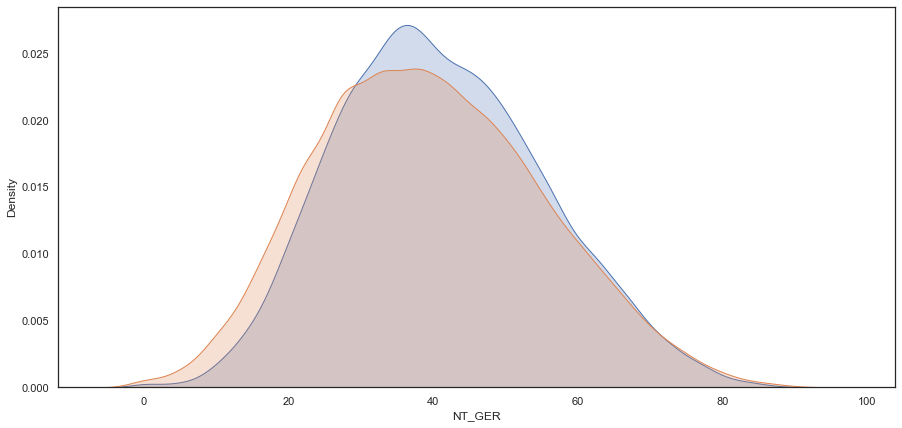

In [19]:
plt.figure(figsize=(15,7))
sns.kdeplot( num_attributes['NT_GER'], label='Privada', shade=True )
sns.kdeplot( num_attributes['NT_CE'], label='Publica', shade=True );

# 2.0. FEATURE ENGINEERING

In [10]:
df2 = df1.copy()

Some categorical columns have numbers or letters representing the classes. The dataset has a dictionary for the variables. Thus, Based on it, the attributes are going to be changed so it can be better visualized in plots. I used some abbreviations:
<br>
* CEFET: Centro Federal de Educação Tecnológica.
* IFECT: Instituo Federal de Educação, Ciência e Tecnologia.
* EJA: Educação de Jovens e Adultos.

In [11]:
df2['CO_ORGACAD'] = df2['CO_ORGACAD'].map({10019:'CEFET', 10020:'Centro Universitário', 
                                           10022:'Faculdade', 10026:'IFECT',
                                          10028:'Universidade'})
df2['CO_MODALIDADE'] = df2['CO_MODALIDADE'].map({1:'Presencial', 2:'À Distância'})
df2['CO_TURNO_GRADUACAO'] = df2['CO_TURNO_GRADUACAO'].map({1:'Matutino', 2:'Vespertino', 3:'Integral',4:'Noturno'})

df2['TP_PRES'] = df2['TP_PRES'].map({222:'Ausente', 334:'Eliminado: participacao indevida', 444:'Ausente: dupla graduação',555:'Presente com resultado válido', 556:'Presente com resultado desconsiderado pela Aplicadora'})
df2['TP_PR_GER'] = df2['TP_PR_GER'].map({222:'Ausente', 333:'Participação com prova em branco', 555:'Participação com respostas na prova',556:'Participação com resultado desconsiderado pela Aplicadora'})
df2['TP_PR_OB_FG'] = df2['TP_PR_OB_FG'].map({222:'Ausente', 333:'Participação com prova em branco', 555:'Participação com respostas na prova',556:'Participação com resultado desconsiderado pela Aplicadora'})
df2['TP_PR_DI_FG'] = df2['TP_PR_DI_FG'].map({222:'Ausente', 333:'Participação com prova em branco', 555:'Participação com respostas na prova',556:'Participação com resultado desconsiderado pela Aplicadora'})
df2['TP_PR_OB_CE'] = df2['TP_PR_OB_CE'].map({222:'Ausente', 333:'Participação com prova em branco', 555:'Participação com respostas na prova',556:'Participação com resultado desconsiderado pela Aplicadora'})
df2['TP_PR_DI_CE'] = df2['TP_PR_DI_CE'].map({222:'Ausente', 333:'Participação com prova em branco', 555:'Participação com respostas na prova',556:'Participação com resultado desconsiderado pela Aplicadora'})

df2['QE_I01'] = df2['QE_I01'].map({'A':'Solteiro (a)', 'B':'Casado (a)', 'C':'Separado (a) / Divorciado (a)', 'D':'Viuvo (a)', 'E': 'Outro'})
df2['QE_I02'] = df2['QE_I02'].map({'A':'Branca', 'B':'Preta', 'C':'Amarela', 'D':'Parda', 'E': 'Indígena', 'F': 'Não quis declarar'})
df2['QE_I04'] = df2['QE_I04'].map({'A':'Nenhuma', 'B':'Fundamental: 1º ao 5º ano', 'C':'Fundamental: 6º ao 9º ano', 'D':'Ensino Médio', 'E': 'Superior (graduação)', 'F': 'Pós-Graduação'})
df2['QE_I05'] = df2['QE_I05'].map({'A':'Nenhuma', 'B':'Fundamental: 1º ao 5º ano', 'C':'Fundamental: 6º ao 9º ano', 'D':'Ensino Médio', 'E': 'Superior (graduação)', 'F': 'Pós-Graduação'})
df2['QE_I08'] = df2['QE_I08'].map({'A':'Até 1,5', 'B':'De 1,5 a 3', 'C':'De 3 a 4,5', 'D':'De 4,5 a 6', 'E': 'de 6 a 10', 'F': 'De 10 a 30', 'G':'Acima de 30'})
df2['QE_I10'] = df2['QE_I10'].map({'A':'Não Trabalha', 'B':'Trabalha Eventualmente', 'C':'Trabalha 20h semanais', 'D':'Trabalha entre 21h e 39h semanais', 'E': 'Trabalha 40h semanais ou mais'})
df2['QE_I11'] = df2['QE_I11'].map({'A':'Nenhum - Curso Gratuito', 'B':'Nenhum - Curso Não Gratuito', 'C':'ProUni Integral', 'D':'ProUni Parcial', 'E': 'FIES', 'F': 'ProUni Parcial e FIES', 'G':'Bolsa do Estado, Distrito ou Município', 'H':'Bolsa da Instituição de Ensino',
                                  'I':'Bolsa de ONG, Empresa, etc.', 'J':'Financiamento da Instituição de Ensino', 'K':'Financiamento Bancário'})
df2['QE_I12'] = df2['QE_I12'].map({'A':'Nenhum', 'B':'Auxílio Moradia', 'C':'Auxílio Alimentação', 'D':'Auxílio Moradia e Alimentação', 'E': 'Auxílio Permanência', 'F': 'Outro Tipo de Auxílio'})
df2['QE_I13'] = df2['QE_I13'].map({'A':'Nenhum', 'B':'Iniciação Científica', 'C':'Extensão', 'D':'Monitoria/Tutoria', 'E': 'Bolsa PET', 'F': 'Outro Tipo de Bolsa'})
df2['QE_I17'] = df2['QE_I17'].map({'A':'Total em Escola Pública', 'B':'Total em Escola Privada', 'C':'Total no Exterior', 'D':'Maior Parte em Pública', 'E': 'Marior Parte em Particular', 'F': 'Parte no Brasil e Parte no exterior'})
df2['QE_I18'] = df2['QE_I18'].map({'A':'Ensino Médio Tradicional', 'B':'Profi. Técnico', 'C':'prof. Magistério', 'D':'EJA e/ou Supletivo', 'E': 'Outra'})
df2['QE_I21'] = df2['QE_I21'].map({'A':'Sim', 'B':'Não'})

df2['QE_I22'] = df2['QE_I22'].map({'A':'Nenhum', 'B':'Um ou Dois', 'C':'Três a Cinco', 'D':'Seis a Oito', 'E': 'Mais de Oito'})
df2['QE_I23'] = df2['QE_I23'].map({'A':'Apenas as Aulas', 'B':'Uma a Três', 'C':'Quantro a Sete', 'D':'Oito a Onze', 'E': 'Mais de Doze'})

In [12]:
df2.drop(['CO_UF_CURSO'], inplace =True, axis=1)

# 3.0. EXPLORATORY DATA ANALYSIS

In [13]:
df3 = df2.copy()

## 3.1. Education Institution Analysis

### 3.1.1. Education Institution Category

In [139]:
# Counting Values

df3['CO_ORGACAD'].value_counts()

Faculdade               7354
Universidade            6123
Centro Universitário    4349
IFECT                     32
Name: CO_ORGACAD, dtype: int64

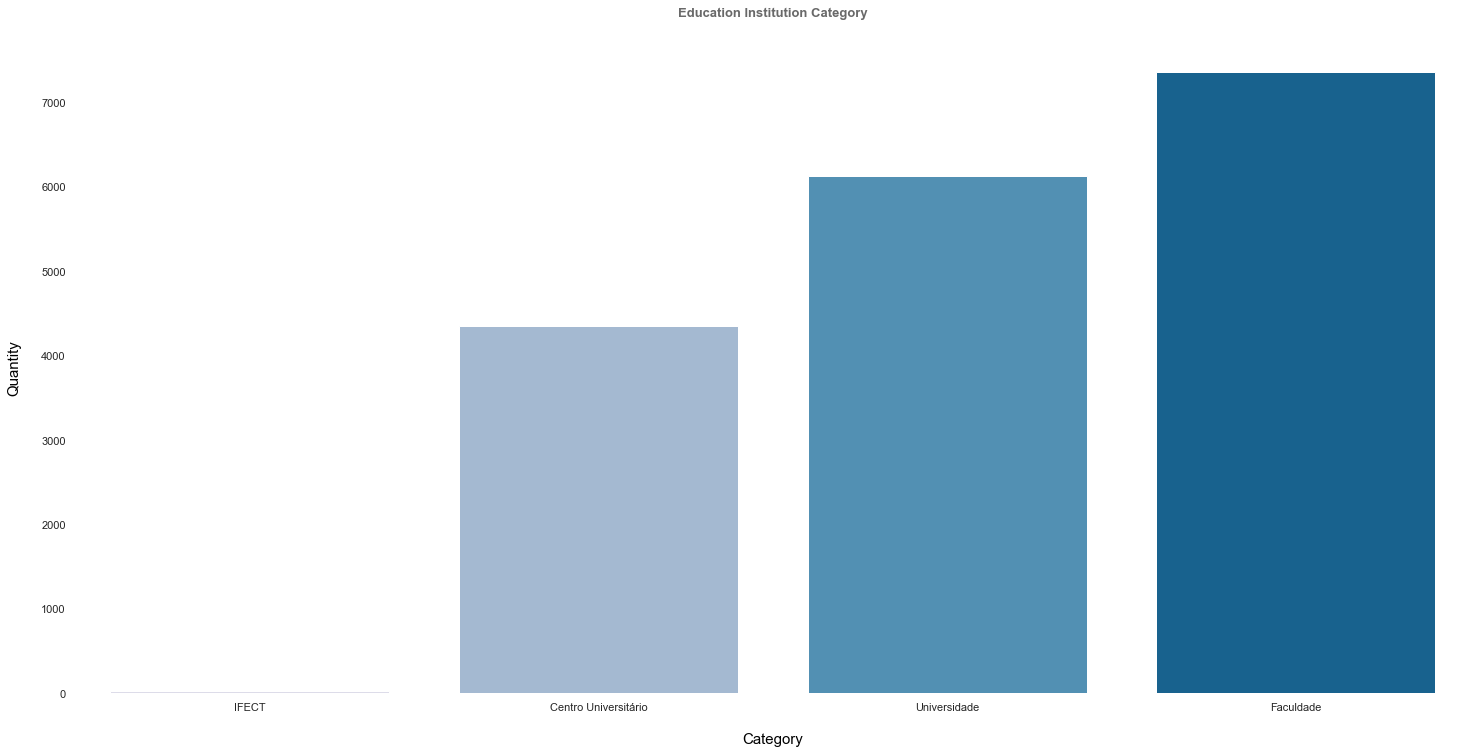

In [151]:
g1 = sns.countplot(x='CO_ORGACAD', data=df3, palette='PuBu',
              order=df3['CO_ORGACAD'].value_counts()[:]\
             .sort_values().index)
g1 = plt.title('Education Institution Category',
               pad = 25,
         fontsize = 13, color ='dimgrey', fontweight = 'bold')
g1 = sns.despine(bottom = True, left=True)
g1 = plt.xlabel('Category', color = 'black', labelpad = 20, fontsize = 15)
g1 = plt.ylabel('Quantity', color = 'black', labelpad = 20, fontsize = 15);

### 3.1.2. Modality of Education 

In [141]:
# Counting Values

df3['CO_MODALIDADE'].value_counts()

Presencial     16910
À Distância      948
Name: CO_MODALIDADE, dtype: int64

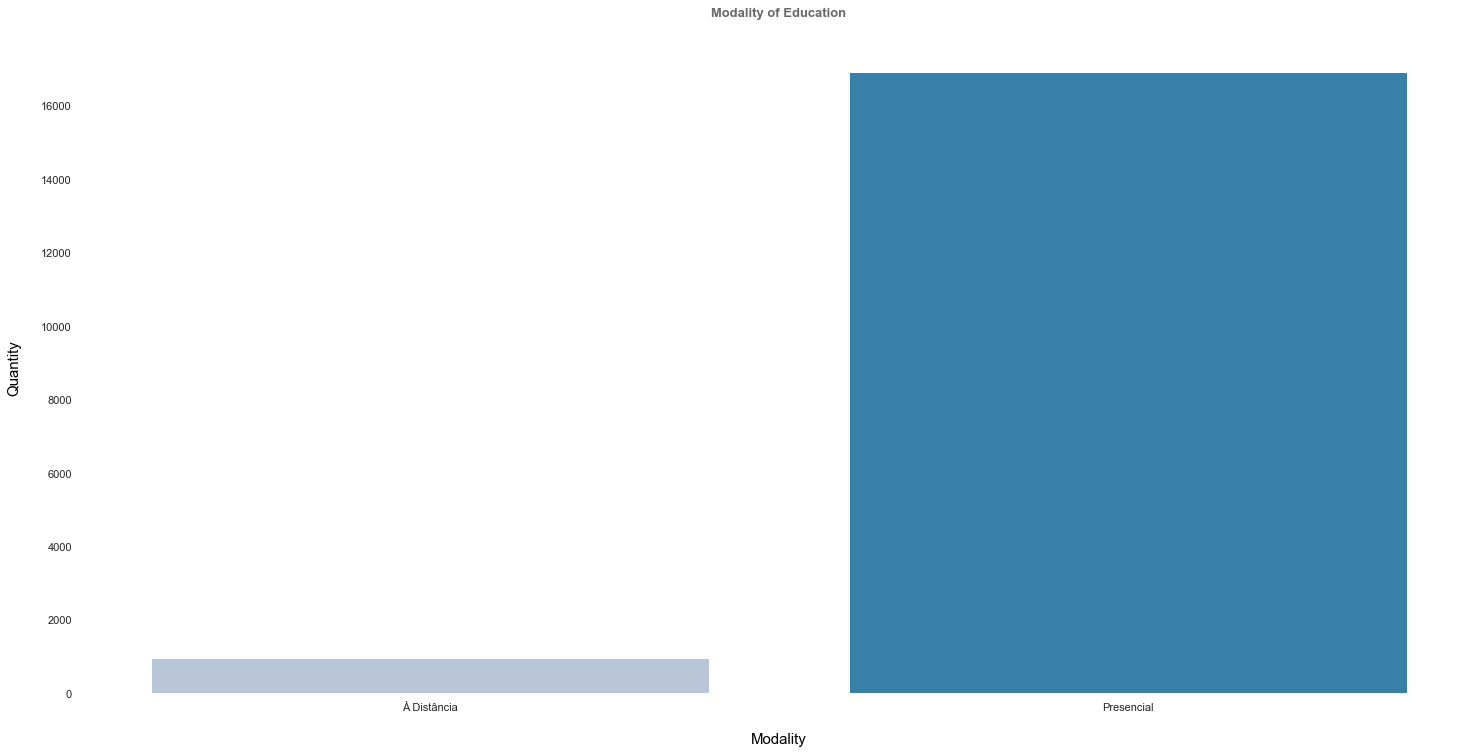

In [150]:
g1 = sns.countplot(x='CO_MODALIDADE', data=df3, palette='PuBu',
              order=df3['CO_MODALIDADE'].value_counts()[:]\
             .sort_values().index)
g1 = plt.title('Modality of Education',
               pad = 25,
         fontsize = 13, color ='dimgrey', fontweight = 'bold')
g1 = sns.despine(bottom = True, left=True)
g1 = plt.xlabel('Modality', color = 'black', labelpad = 20, fontsize = 15)
g1 = plt.ylabel('Quantity', color = 'black', labelpad = 20, fontsize = 15);

## 3.2. Student Analysis

### 3.2.1. Age, Gender, Race and Marital Status

**Conclusions**:
* There are more women than men in the exam;
* Both women and men's ages are more concentrated between 20 and 30 years old;
* There are more mulattos students, followed by black and then white.
* There are more single students. Their age is more concentrated between 20 a and 28 years old. Marriage students's age is more concentrated in a greater range: 20 and 45 years old. We can't say anything so clearly about divorced and windower's age distribution, there's no evidence of concentration

**Age**

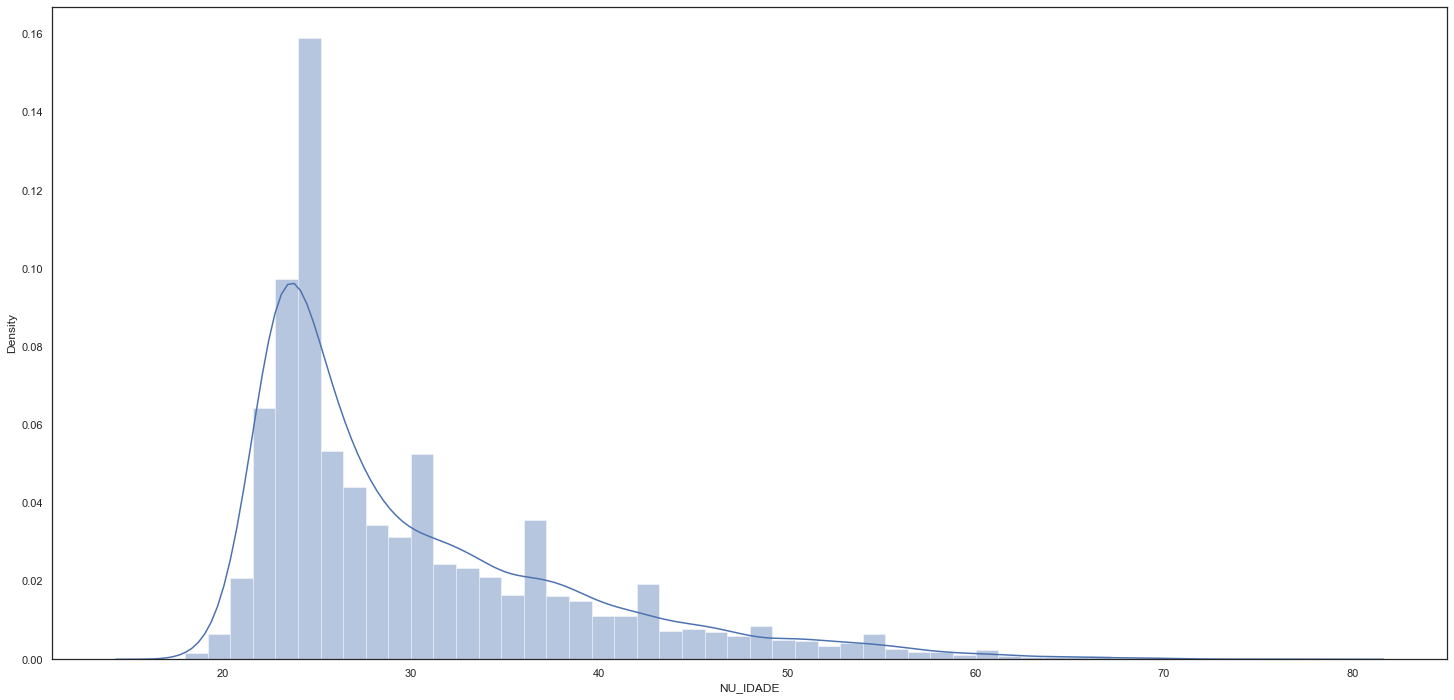

In [81]:
sns.distplot(df3['NU_IDADE']);

The age is right skewd (skewness = 1.4). So, the mean is greater than the median, indicating that (and we can see in the plot) there are more young students than old ones.

**Gender and Age**

In [78]:
# Counting Values

df3['TP_SEXO'].value_counts()

F    11249
M     6609
Name: TP_SEXO, dtype: int64

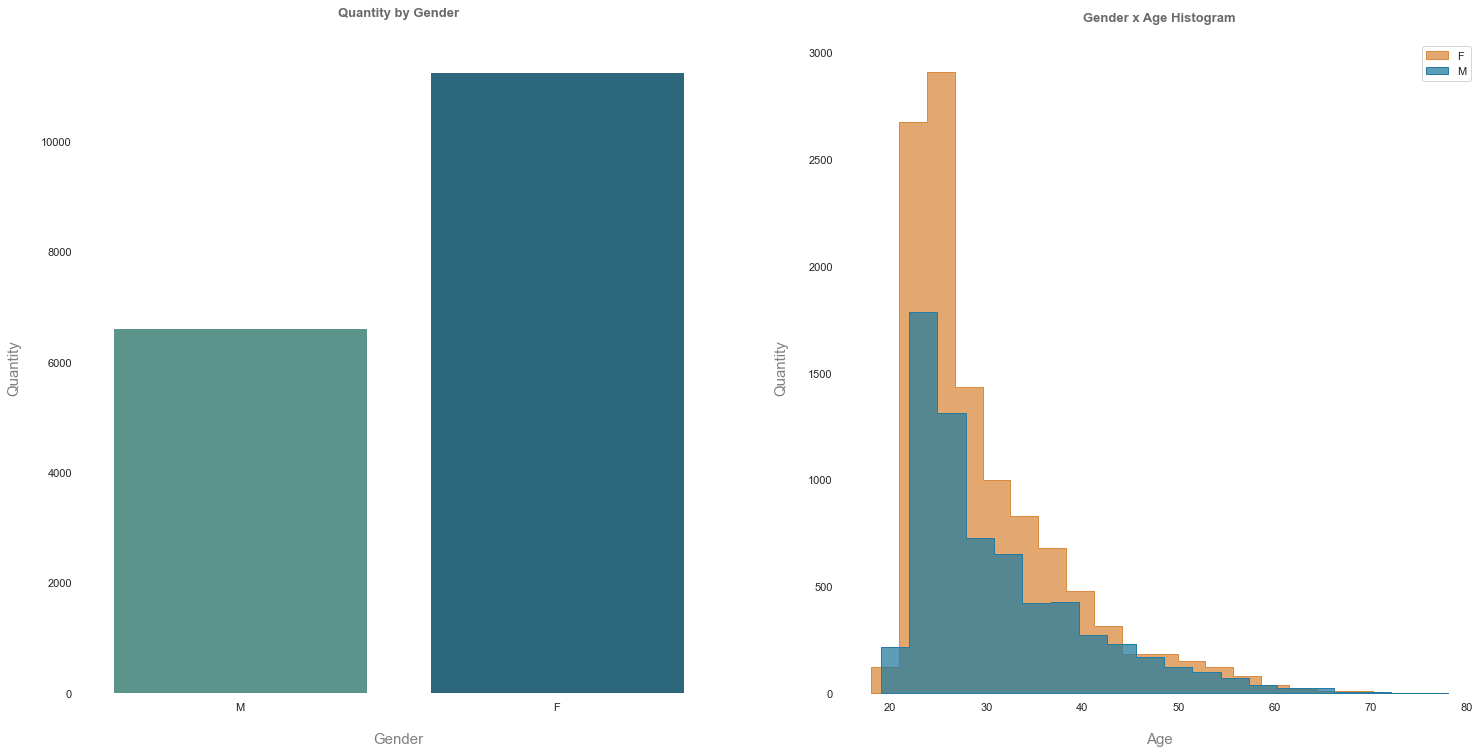

In [96]:
g1 = plt.subplot(1, 2, 1)
g1 = sns.countplot(x='TP_SEXO', data=df3, palette='crest',
              order=df3['TP_SEXO'].value_counts()[:]\
             .sort_values().index)
g1 = plt.title('Quantity by Gender',
               pad = 25,
         fontsize = 20, color ='dimgrey', fontweight = 'bold')
g1 = sns.despine(bottom = True, left=True)
g1 = plt.xlabel('Gender', color = 'grey', labelpad = 20, fontsize = 15)
g1 = plt.ylabel('Quantity', color = 'grey', labelpad = 20, fontsize = 15)

################################################
g2 = plt.subplot(1, 2, 2)
sns.histplot(df3[df3['TP_SEXO'] == 'F']['NU_IDADE'], bins = 20, label = 'F', element = 'step',
             color = '#da8b40')
sns.histplot(df3[df3['TP_SEXO'] == 'M']['NU_IDADE'], bins = 20, label = 'M', element = 'step',
             color = '#257ca0')

g2 = plt.title('Gender x Age Histogram',
               pad = 20,
         fontsize = 20, color ='dimgrey', fontweight = 'bold')
g2 = sns.despine(bottom = True, left=True)
g2 = plt.xlabel('Age', color = 'grey', labelpad = 20, fontsize = 15)
g2 = plt.ylabel('Quantity', color = 'grey', labelpad = 20, fontsize = 15)
g2 = plt.legend();

**Race by gender**

In [85]:
# Counting Values

df3['QE_I02'].value_counts()

Parda                8266
Preta                4875
Branca               3770
Não quis declarar     450
Amarela               424
Indígena               73
Name: QE_I02, dtype: int64

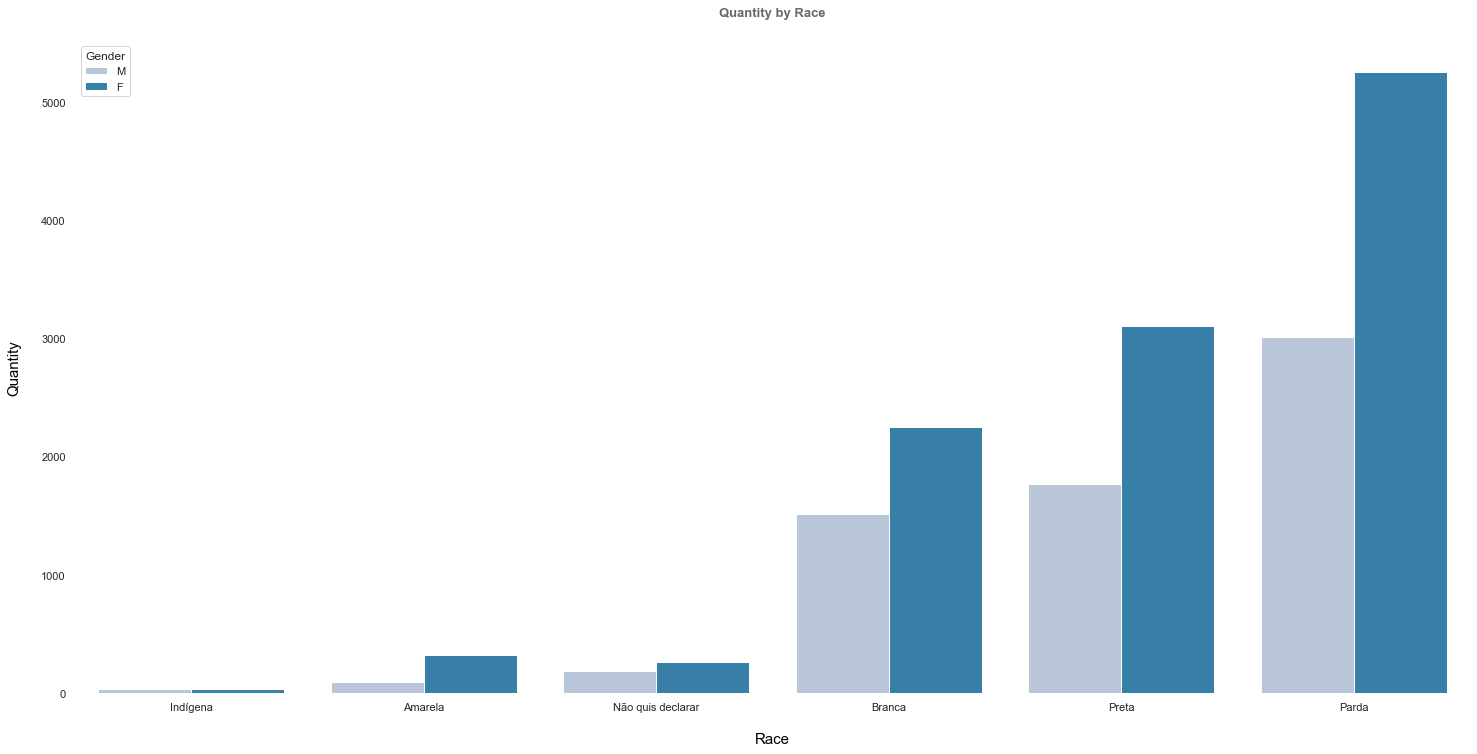

In [101]:
g1 = sns.countplot(x='QE_I02', hue = 'TP_SEXO', data=df3, palette='PuBu',
              order=df3['QE_I02'].value_counts()[:]\
             .sort_values().index)
g1 = plt.title('Quantity by Race',
               pad = 25,
         fontsize = 20, color ='dimgrey', fontweight = 'bold')
g1 = sns.despine(bottom = True, left=True)
g1 = plt.xlabel('Race', color = 'black', labelpad = 20, fontsize = 15)
g1 = plt.ylabel('Quantity', color = 'black', labelpad = 20, fontsize = 15)
g1 = plt.legend(title='Gender');

**Marital Status**

In [102]:
# Counting Values

df3['QE_I01'].value_counts()

Solteiro (a)                     13185
Casado (a)                        3439
Outro                              643
Separado (a) / Divorciado (a)      530
Viuvo (a)                           61
Name: QE_I01, dtype: int64

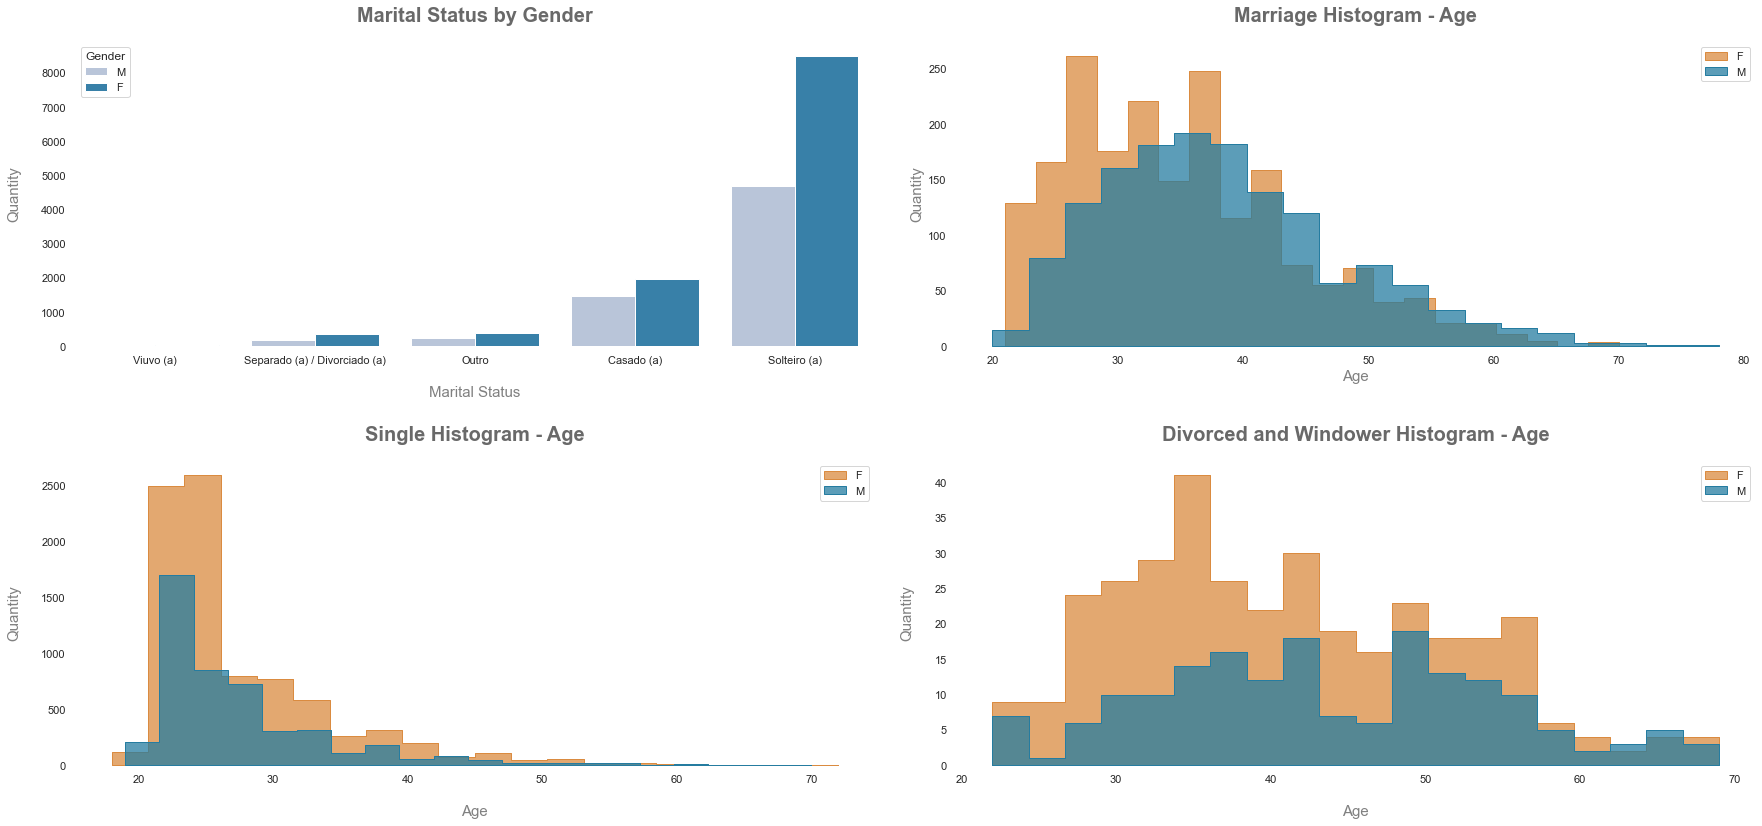

In [121]:
g1 = plt.subplot(2, 2, 1)
g1 = sns.countplot(x='QE_I01', hue = 'TP_SEXO', data=df3, palette='PuBu',
              order=df3['QE_I01'].value_counts()[:]\
             .sort_values().index)
g1 = plt.title('Marital Status by Gender',
               pad = 20,
         fontsize = 20, color ='dimgrey', fontweight = 'bold')
g1 = sns.despine(bottom = True, left=True)
g1 = plt.xlabel('Marital Status', color = 'grey', labelpad = 20, fontsize = 15)
g1 = plt.ylabel('Quantity', color = 'grey', labelpad = 20, fontsize = 15)
g1 = plt.legend(title='Gender')

################################################
g2 = plt.subplot(2, 2, 2)
married = df3[df3['QE_I01'] == 'Casado (a)']
sns.histplot(married[married['TP_SEXO'] == 'F']['NU_IDADE'], bins = 20, label = 'F', element = 'step',
             color = '#da8b40')
sns.histplot(married[married['TP_SEXO'] == 'M']['NU_IDADE'], bins = 20, label = 'M', element = 'step',
             color = '#257ca0')

g2 = plt.title('Marriage Histogram - Age',
               pad = 20,
         fontsize = 20, color ='dimgrey', fontweight = 'bold')
g2 = sns.despine(bottom = True, left=True)
g2 = plt.xlabel('Age', color = 'grey',  fontsize = 15)
g2 = plt.ylabel('Quantity', color = 'grey', fontsize = 15)
g2 = plt.legend()

################################################
g3 = plt.subplot(2, 2, 3)
single = df3[df3['QE_I01'] == 'Solteiro (a)']
sns.histplot(single[single['TP_SEXO'] == 'F']['NU_IDADE'], bins = 20, label = 'F', element = 'step',
             color = '#da8b40')
sns.histplot(single[single['TP_SEXO'] == 'M']['NU_IDADE'], bins = 20, label = 'M', element = 'step',
             color = '#257ca0')

g2 = plt.title('Single Histogram - Age',
               pad = 20,
         fontsize = 20, color ='dimgrey', fontweight = 'bold')
g2 = sns.despine(bottom = True, left=True)
g2 = plt.xlabel('Age', color = 'grey', labelpad = 20, fontsize = 15)
g2 = plt.ylabel('Quantity', color = 'grey', labelpad = 20, fontsize = 15)
g2 = plt.legend()

################################################
g4 = plt.subplot(2, 2, 4)
divorced = df3[(df3['QE_I01'] == 'Separado (a) / Divorciado (a)') | (df['QE_I01'] == 'Viuvo (a)')]
sns.histplot(divorced[divorced['TP_SEXO'] == 'F']['NU_IDADE'], bins = 20, label = 'F', element = 'step',
             color = '#da8b40')
sns.histplot(divorced[divorced['TP_SEXO'] == 'M']['NU_IDADE'], bins = 20, label = 'M', element = 'step',
             color = '#257ca0')

g4 = plt.title('Divorced and Windower Histogram - Age',
               pad = 20,
         fontsize = 20, color ='dimgrey', fontweight = 'bold')
g4 = sns.despine(bottom = True, left=True)
g4 = plt.xlabel('Age', color = 'grey', labelpad = 20, fontsize = 15)
g4 = plt.ylabel('Quantity', color = 'grey', labelpad = 20, fontsize = 15)
g4 = plt.legend()
plt.tight_layout();

### 3.2.2. Class Period, High School Type and Teaching Method in High School

**Conclusions**:
* Most of them have class in the evening-night period, followed by hte morning period;
* In all periods (Morning, Afternoon, Nocturn and full-time), the students Age is more concentrated between 20 and 30 years old. However, nocturnal Students Age is more distributed than the others. It can also be seen by comparing the mean: nocturnal students has a greater age mean;
* the majority of the students studied in a classical brazilian high school;
* The majority of them studied the entire high school in a State school. The 'Entire Private School' students corresponds only to about one third of the 'Entire State School' students.

In [47]:
# Counting Values

cols = ['CO_TURNO_GRADUACAO', 'QE_I18', 'QE_I17']
for col in cols:
    print(df3[col].value_counts(), '\n')

Noturno       11640
Matutino       4527
Integral       1086
Vespertino      605
Name: CO_TURNO_GRADUACAO, dtype: int64 

Ensino Médio Tradicional    14690
Profi. Técnico               1637
EJA e/ou Supletivo            727
prof. Magistério              571
Outra                         233
Name: QE_I18, dtype: int64 

Total em Escola Pública                12280
Total em Escola Privada                 4007
Maior Parte em Pública                   793
Marior Parte em Particular               746
Parte no Brasil e Parte no exterior       25
Total no Exteriro                          7
Name: QE_I17, dtype: int64 



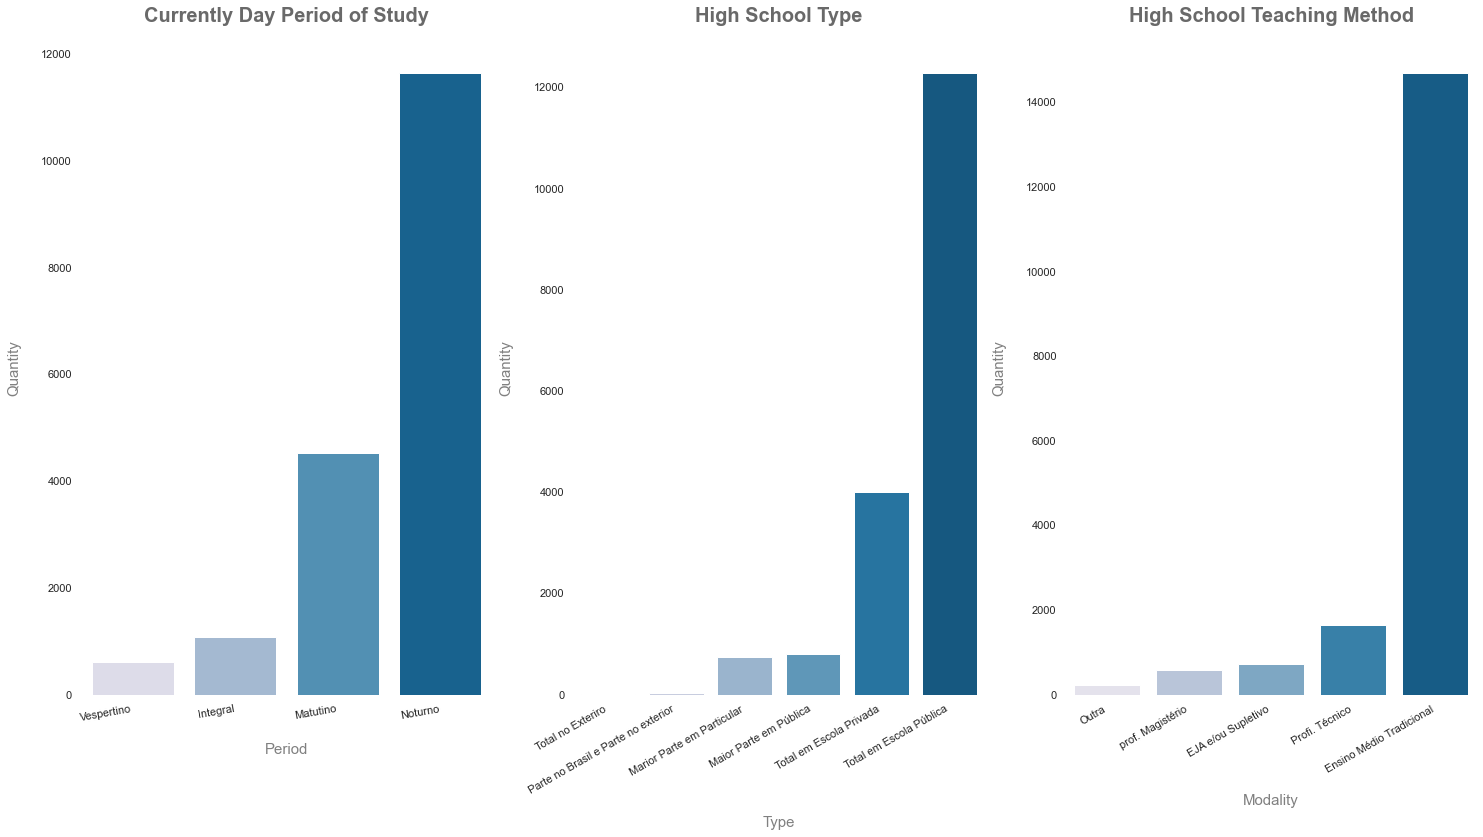

In [61]:
g2 = plt.subplot(1, 3, 1)
g1 = sns.countplot(x='CO_TURNO_GRADUACAO', data=df3, palette='PuBu',
              order=df3['CO_TURNO_GRADUACAO'].value_counts()[:]\
             .sort_values().index)
g1 = plt.title('Currently Day Period of Study',
               pad = 20,
         fontsize = 20, color ='dimgrey', fontweight = 'bold')
g1 = sns.despine(bottom = True, left=True)
g1 = plt.xlabel('Period', color = 'grey', labelpad = 20, fontsize = 15)
g1 = plt.ylabel('Quantity', color = 'grey', labelpad = 20, fontsize = 15)
plt.xticks(rotation=10, horizontalalignment='right')

################################################
g2 = plt.subplot(1, 3, 2)
g2 = sns.countplot(x='QE_I17', data=df3, palette='PuBu',
              order=df3['QE_I17'].value_counts()[:]\
             .sort_values().index)
g2 = plt.title('High School Type',
               pad = 20,
         fontsize = 20, color ='dimgrey', fontweight = 'bold')
g2 = sns.despine(bottom = True, left=True)
g2 = plt.xlabel('Type', color = 'grey', labelpad = 20, fontsize = 15)
g2 = plt.ylabel('Quantity', color = 'grey', labelpad = 20, fontsize = 15)
plt.xticks(rotation=30, horizontalalignment='right')

################################################
g3 = plt.subplot(1, 3, 3)
g3 = sns.countplot(x='QE_I18', data=df3, palette='PuBu',
              order=df3['QE_I18'].value_counts()[:]\
             .sort_values().index)
g3 = plt.title('High School Teaching Method',
               pad = 20,
         fontsize = 20, color ='dimgrey', fontweight = 'bold')
g3 = sns.despine(bottom = True, left=True)
g3 = plt.xlabel('Modality', color = 'grey', labelpad = 20, fontsize = 15)
g3 = plt.ylabel('Quantity', color = 'grey', labelpad = 20, fontsize = 15)
plt.xticks(rotation=30, horizontalalignment='right');

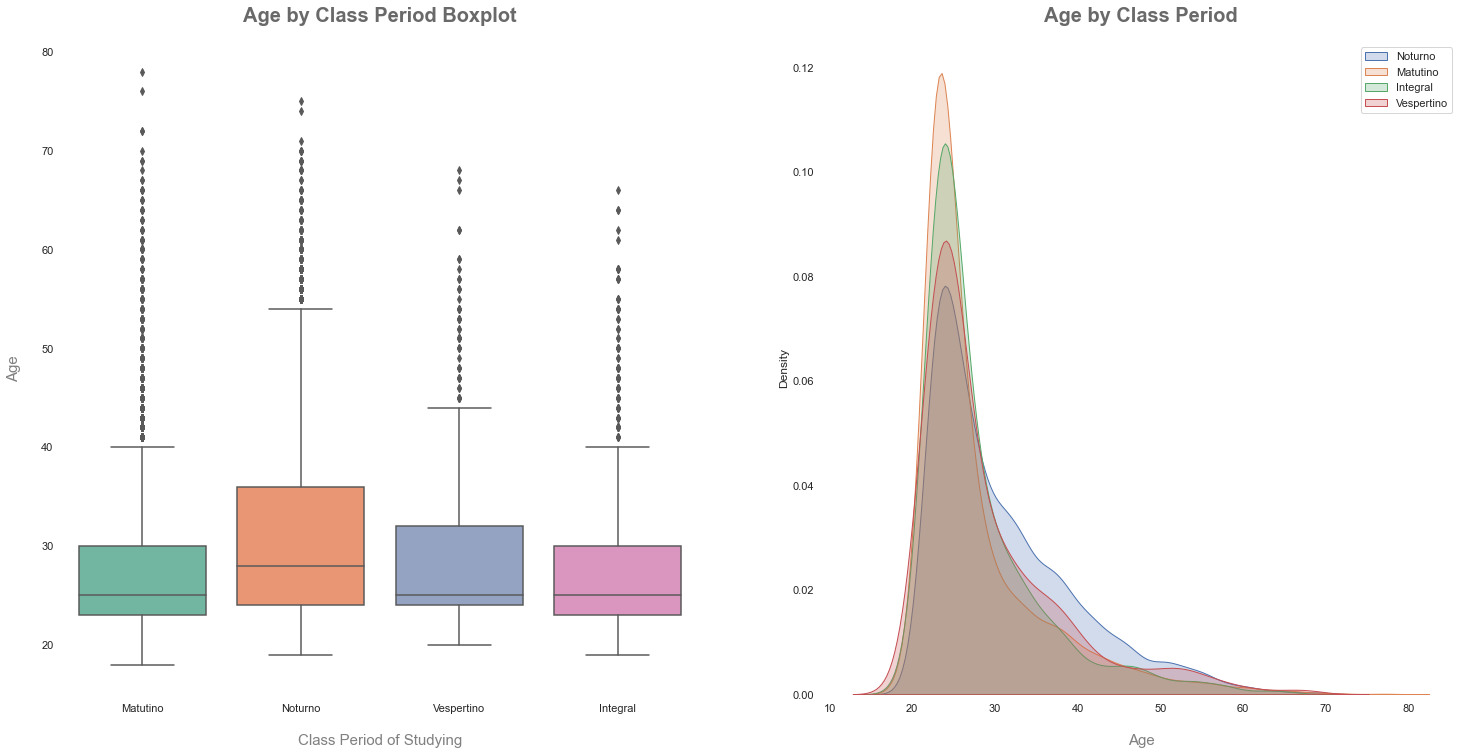

In [19]:
g4 = plt.subplot(1, 2, 1)
g4 = sns.boxplot(x='CO_TURNO_GRADUACAO', y = 'NU_IDADE', data = df3, palette = 'Set2')
g4 = plt.title('Age by Class Period Boxplot',
               pad = 20,
         fontsize = 20, color ='dimgrey', fontweight = 'bold')
g4 = sns.despine(bottom = True, left=True)
g4 = plt.xlabel('Class Period of Studying', color = 'grey', labelpad = 20, fontsize = 15)
g4 = plt.ylabel('Age', color = 'grey', labelpad = 20, fontsize = 15);

g5 = plt.subplot(1, 2, 2)
sns.kdeplot(df3[df3['CO_TURNO_GRADUACAO'] == 'Noturno']['NU_IDADE'], label = 'Noturno', shade = True)
sns.kdeplot(df3[df3['CO_TURNO_GRADUACAO'] == 'Matutino']['NU_IDADE'], label = 'Matutino', shade = True)
sns.kdeplot(df3[df3['CO_TURNO_GRADUACAO'] == 'Integral']['NU_IDADE'], label = 'Integral', shade = True)
sns.kdeplot(df3[df3['CO_TURNO_GRADUACAO'] == 'Vespertino']['NU_IDADE'], label = 'Vespertino', shade = True)
plt.title('Age by Class Period',
               pad = 20,
         fontsize = 20, color ='dimgrey', fontweight = 'bold')
sns.despine(bottom = True, left=True)
plt.xlabel('Age', color = 'grey', labelpad = 20, fontsize = 15)
plt.legend();

In [63]:
df3[['CO_TURNO_GRADUACAO', 'NU_IDADE']].groupby('CO_TURNO_GRADUACAO').mean()

,NU_IDADE
CO_TURNO_GRADUACAO,
Integral,28.178
Matutino,27.983
Noturno,31.051
Vespertino,29.231


### 3.2.3. Student's Income and Family Characteristics

**Conclusions**:
* The majority of the parents has completed only the high school. Few of them has a graduate degree;
* About 68% of the student have a family member that have completed an undergraduate course;
* About 62% of teh students has a family total income up to 3 salaries;
* About 44% of the students hasn't a job, while about 48% has a fixed job.

**Parents Education**

In [66]:
# Counting Values

# mother
print(df3['QE_I05'].value_counts(), '\n')

#father
print(df3['QE_I04'].value_counts())

Ensino Médio                 6908
Fundamental: 1º ao 5º ano    3763
Fundamental: 6º ao 9º ano    2437
Superior (graduação)         2177
Pós-Graduação                1361
Nenhuma                      1212
Name: QE_I05, dtype: int64 

Ensino Médio                 6081
Fundamental: 1º ao 5º ano    4866
Fundamental: 6º ao 9º ano    2693
Superior (graduação)         1947
Nenhuma                      1610
Pós-Graduação                 661
Name: QE_I04, dtype: int64


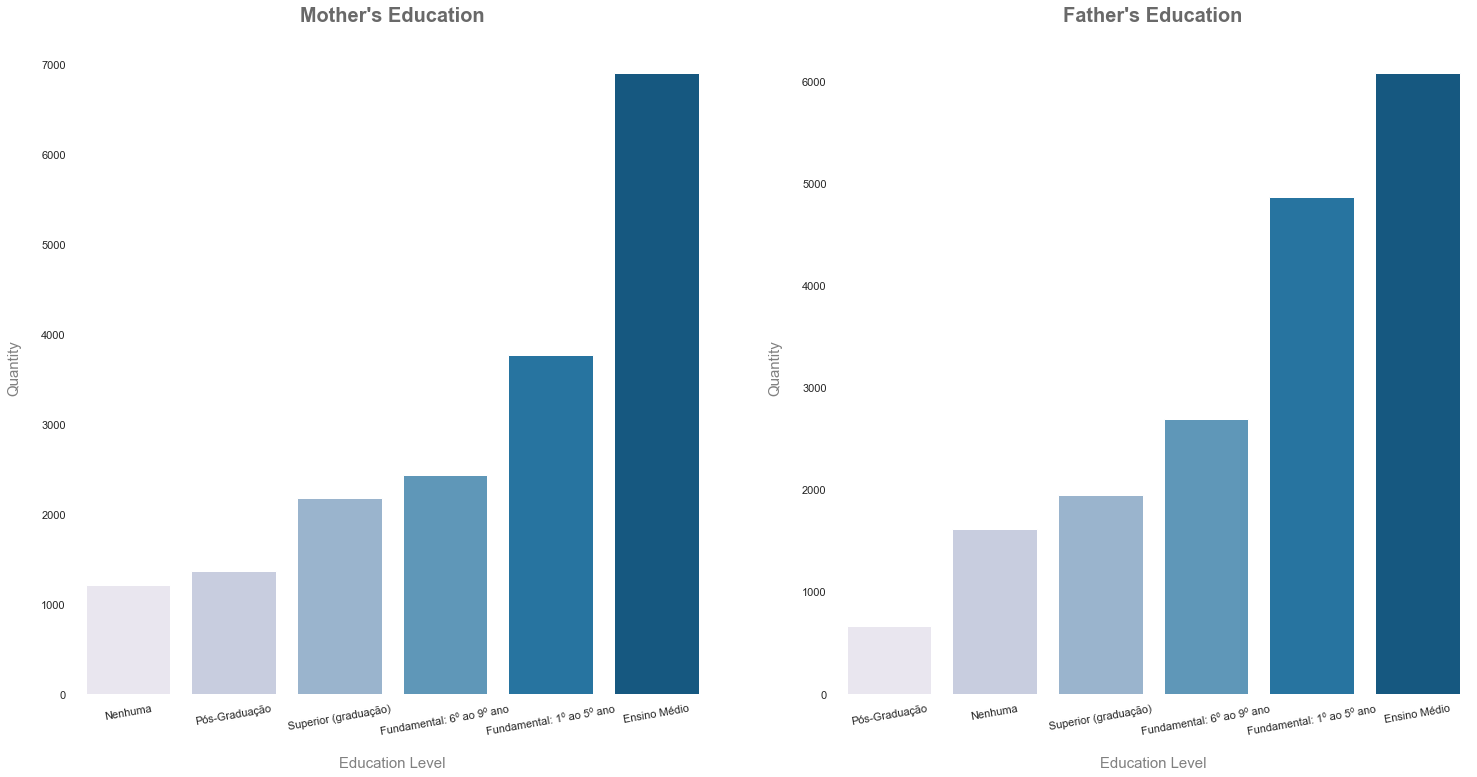

In [70]:
g2 = plt.subplot(1, 2, 1)
g1 = sns.countplot(x='QE_I05', data=df3, palette='PuBu',
              order=df3['QE_I05'].value_counts()[:]\
             .sort_values().index)
g1 = plt.title('Mother\'s Education',
               pad = 20,
         fontsize = 20, color ='dimgrey', fontweight = 'bold')
g1 = sns.despine(bottom = True, left=True)
g1 = plt.xlabel('Education Level', color = 'grey', labelpad = 20, fontsize = 15)
g1 = plt.ylabel('Quantity', color = 'grey', labelpad = 20, fontsize = 15)
plt.xticks(rotation=10)

################################################
g2 = plt.subplot(1, 2, 2)
g2 = sns.countplot(x='QE_I04', data=df3, palette='PuBu',
              order=df3['QE_I04'].value_counts()[:]\
             .sort_values().index)
g2 = plt.title('Father\'s Education',
               pad = 20,
         fontsize = 20, color ='dimgrey', fontweight = 'bold')
g2 = sns.despine(bottom = True, left=True)
g2 = plt.xlabel('Education Level', color = 'grey', labelpad = 20, fontsize = 15)
g2 = plt.ylabel('Quantity', color = 'grey', labelpad = 20, fontsize = 15)
plt.xticks(rotation=10);

**how many members of the family has completed a Bachelor's Degree or more**

In [73]:
print(df3['QE_I21'].value_counts())

Sim    12151
Não     5707
Name: QE_I21, dtype: int64


In [113]:
print('Percentage: \n','Yes: ', df3['QE_I21'].value_counts()[0]/len(df3['QE_I21']), '\n', ' No: ',df3['QE_I21'].value_counts()[1]/len(df3['QE_I21']))

Percentage: 
 Yes:  0.6804233396796954 
  No:  0.31957666032030463


**Total Family Income**

In [122]:
print('Percentage of student\'s family with a salary up to 3: ',round((df3['QE_I08'].value_counts()[0] + df3['QE_I08'].value_counts()[1])/len(df3['QE_I08'])*100, 2),'%')

Percentage of student's family with a salary up to 3:  62.5 %


In [75]:
print(df3['QE_I08'].value_counts())

Até 1,5        5810
De 1,5 a 3     5351
De 3 a 4,5     2919
De 4,5 a 6     1362
de 6 a 10      1324
De 10 a 30      881
Acima de 30     211
Name: QE_I08, dtype: int64


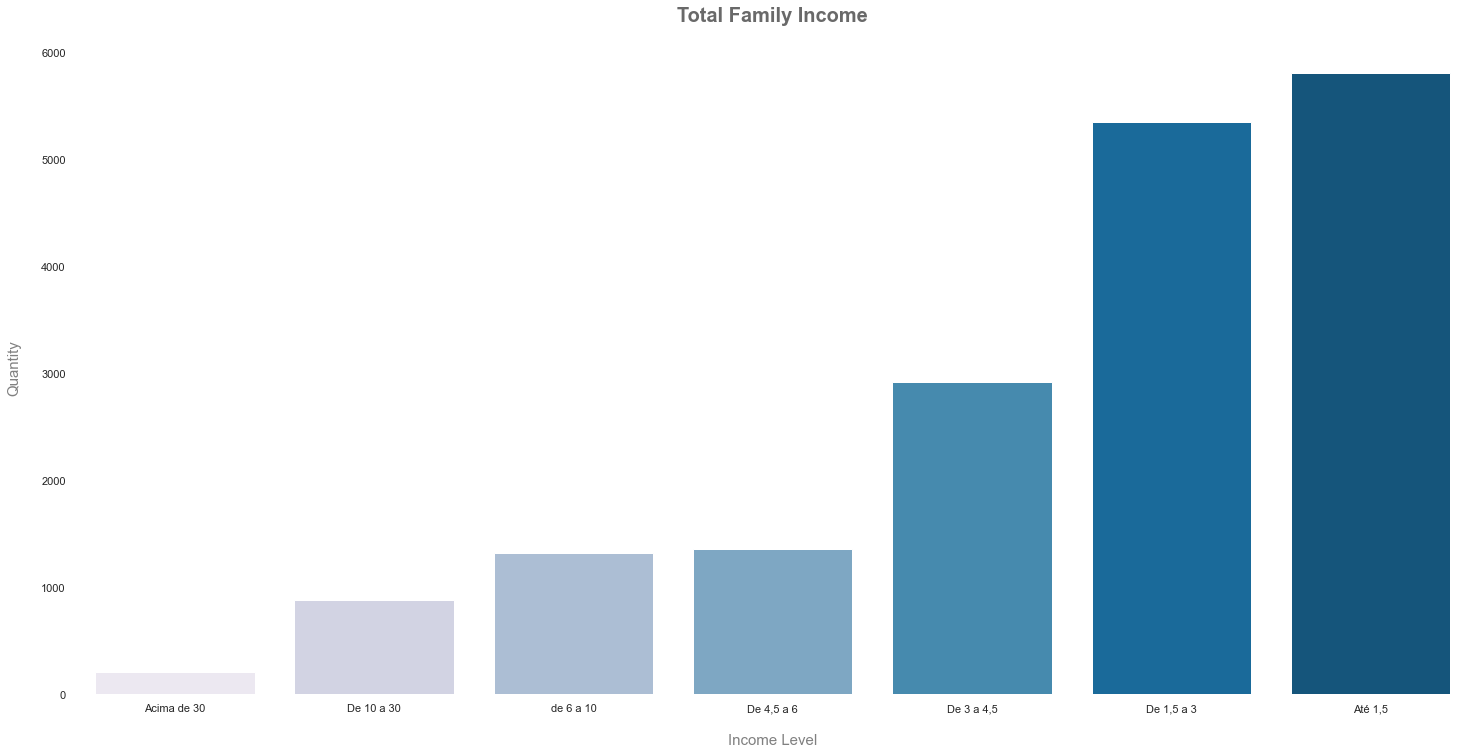

In [83]:
g2 = sns.countplot(x='QE_I08', data=df3, palette='PuBu',
              order=df3['QE_I08'].value_counts()[:]\
             .sort_values().index)
g2 = plt.title('Total Family Income',
               pad = 20,
         fontsize = 20, color ='dimgrey', fontweight = 'bold')
g2 = sns.despine(bottom = True, left=True)
g2 = plt.xlabel('Income Level', color = 'grey', labelpad = 20, fontsize = 15)
g2 = plt.ylabel('Quantity', color = 'grey', labelpad = 20, fontsize = 15);

**Student's Job Situation**

In [78]:
print(df3['QE_I10'].value_counts())

Não Trabalha                         7982
Trabalha 40h semanais ou mais        5893
Trabalha entre 21h e 39h semanais    1440
Trabalha 20h semanais                1311
Trabalha Eventualmente               1232
Name: QE_I10, dtype: int64


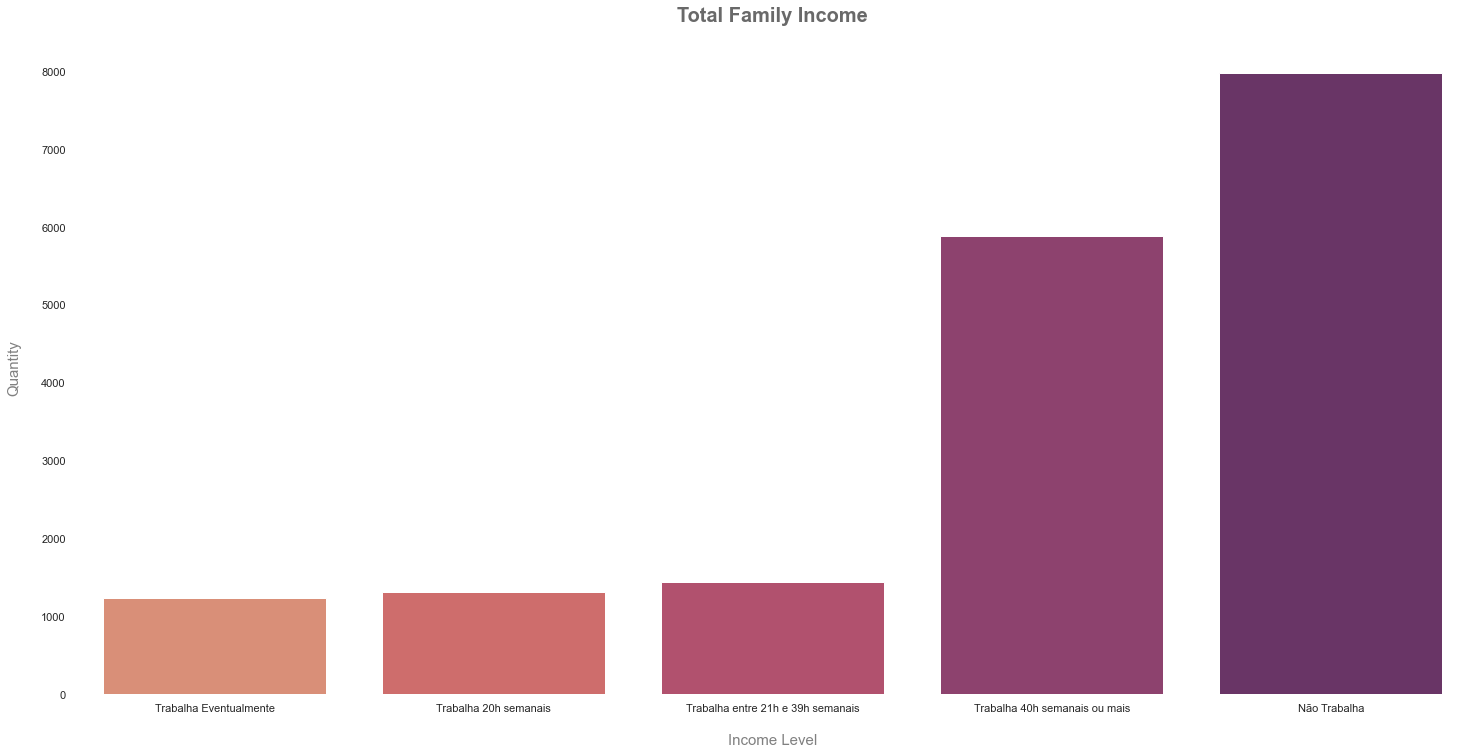

In [89]:
g = sns.countplot(x='QE_I10', data=df3, palette='flare',
              order=df3['QE_I10'].value_counts()[:]\
             .sort_values().index)
g = plt.title('Total Family Income',
               pad = 20,
         fontsize = 20, color ='dimgrey', fontweight = 'bold')
g = sns.despine(bottom = True, left=True)
g = plt.xlabel('Income Level', color = 'grey', labelpad = 20, fontsize = 15)
g = plt.ylabel('Quantity', color = 'grey', labelpad = 20, fontsize = 15);

In [148]:
for employ,quant in zip(df3['QE_I10'].value_counts().index,range(0,5)):
    print(employ, round(df3['QE_I10'].value_counts()[quant]/len(df3['QE_I10'])*100, 2), '%')

Não Trabalha 44.7 %
Trabalha 40h semanais ou mais 33.0 %
Trabalha entre 21h e 39h semanais 8.06 %
Trabalha 20h semanais 7.34 %
Trabalha Eventualmente 6.9 %


### 2.2.4. Grades

**Conclusions**:
* The score of the general contents exam is concentrated over a greater mean than the Specific scores. To better understand why it is happening, it is necessary to look at the students feedback about the exam dificulty, but we won't do it for now.

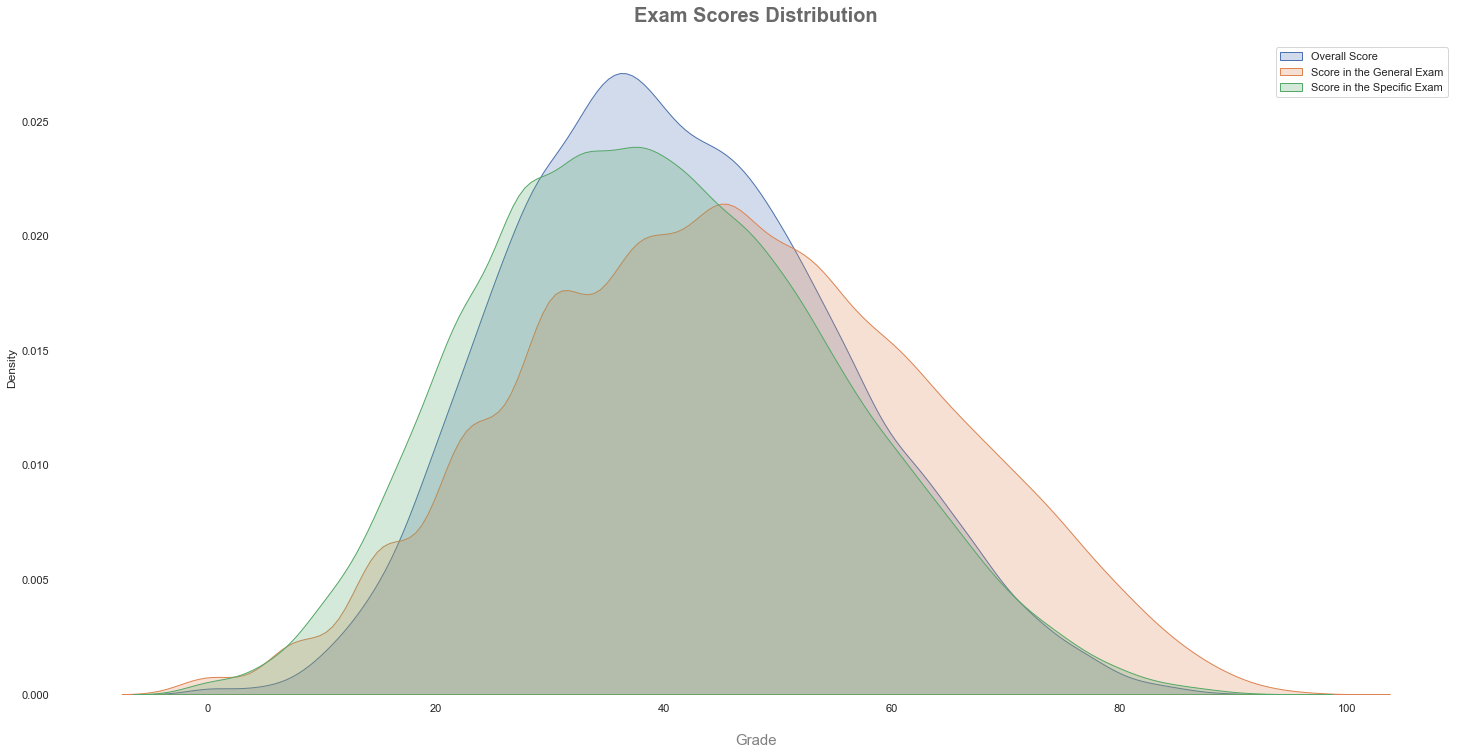

In [150]:
sns.kdeplot(df3['NT_GER'], label = 'Overall Score', shade = True)
sns.kdeplot(df3['NT_FG'], label = 'Score in the General Exam', shade = True)
sns.kdeplot(df3['NT_CE'], label = 'Score in the Specific Exam', shade = True)
plt.title('Exam Scores Distribution',
               pad = 20,
         fontsize = 20, color ='dimgrey', fontweight = 'bold')
sns.despine(bottom = True, left=True)
plt.xlabel('Grade', color = 'grey', labelpad = 20, fontsize = 15)
plt.legend();

## 3.3. Hypothesis Creation and Validation

To better understand the relation of some variables and the scores, some hypothesis was made. <br>
the following mind map was created to guide the hypothesis formulation. <br>


_The following hypothesis is not about causation, but correlation._

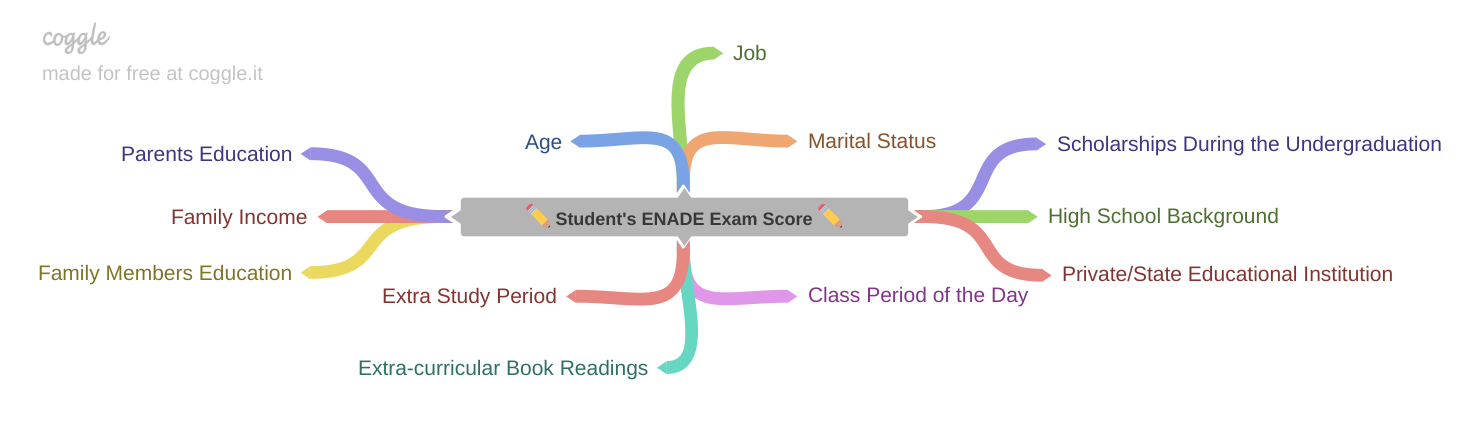

In [7]:
Image( '../img/enademindmap.png' )

### 3.3.1. Hypothesis

**1.** Employed Students tends to have a lower score;

**2.** Students who received a scholarship or some aid tends to have a higher score;

**3.** Students who takes extra periods of study tends to have a higher score;

**4.** The Highest the Family Income, the highest the score;

**5.** The higher the parents education level, the higher the score.

### H1. Employed Students tends to have a lower score
**Conclusions**:
* We couldn't find any statistical evidence of job affecting negatively the score;
* The score mean for students who works between 21 and 39 hours per week, even though there's statistically difference, is higher than the other classes.

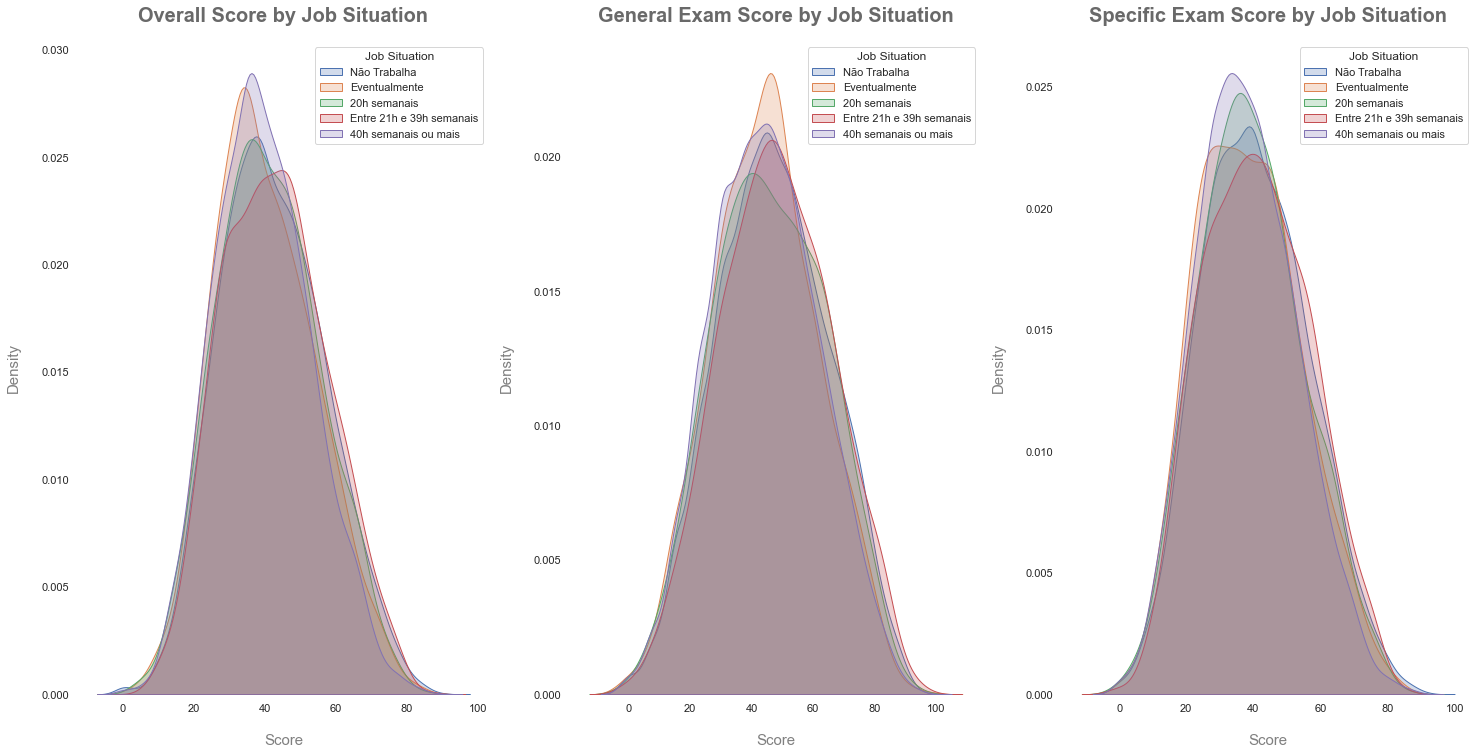

In [23]:
g1 = plt.subplot(1, 3, 1)
sns.kdeplot(df3[df3['QE_I10'] == 'Não Trabalha']['NT_GER'], label = 'Não Trabalha', shade = True)
sns.kdeplot(df3[df3['QE_I10'] == 'Trabalha Eventualmente']['NT_GER'], label = 'Eventualmente', shade = True)
sns.kdeplot(df3[df3['QE_I10'] == 'Trabalha 20h semanais']['NT_GER'], label = '20h semanais', shade = True)
sns.kdeplot(df3[df3['QE_I10'] == 'Trabalha entre 21h e 39h semanais']['NT_GER'], label = 'Entre 21h e 39h semanais', shade = True)
sns.kdeplot(df3[df3['QE_I10'] == 'Trabalha 40h semanais ou mais']['NT_GER'], label = '40h semanais ou mais', shade = True)
g1 = plt.title('Overall Score by Job Situation',
               pad = 20,
         fontsize = 20, color ='dimgrey', fontweight = 'bold')
g1 = sns.despine(bottom = True, left=True)
g1 = plt.xlabel('Score', color = 'grey', labelpad = 20, fontsize = 15)
g1 = plt.ylabel('Density', color = 'grey', labelpad = 20, fontsize = 15)
plt.legend(title='Job Situation')

#################################################
g2 = plt.subplot(1, 3, 2)
sns.kdeplot(df3[df3['QE_I10'] == 'Não Trabalha']['NT_FG'], label = 'Não Trabalha', shade = True)
sns.kdeplot(df3[df3['QE_I10'] == 'Trabalha Eventualmente']['NT_FG'], label = 'Eventualmente', shade = True)
sns.kdeplot(df3[df3['QE_I10'] == 'Trabalha 20h semanais']['NT_FG'], label = '20h semanais', shade = True)
sns.kdeplot(df3[df3['QE_I10'] == 'Trabalha entre 21h e 39h semanais']['NT_FG'], label = 'Entre 21h e 39h semanais', shade = True)
sns.kdeplot(df3[df3['QE_I10'] == 'Trabalha 40h semanais ou mais']['NT_FG'], label = '40h semanais ou mais', shade = True)
g2 = plt.title('General Exam Score by Job Situation',
               pad = 20,
         fontsize = 20, color ='dimgrey', fontweight = 'bold')
g2 = sns.despine(bottom = True, left=True)
g2 = plt.xlabel('Score', color = 'grey', labelpad = 20, fontsize = 15)
g2 = plt.ylabel('Density', color = 'grey', labelpad = 20, fontsize = 15)
plt.legend(title='Job Situation')

#################################################
g3 = plt.subplot(1, 3, 3)
sns.kdeplot(df3[df3['QE_I10'] == 'Não Trabalha']['NT_CE'], label = 'Não Trabalha', shade = True)
sns.kdeplot(df3[df3['QE_I10'] == 'Trabalha Eventualmente']['NT_CE'], label = 'Eventualmente', shade = True)
sns.kdeplot(df3[df3['QE_I10'] == 'Trabalha 20h semanais']['NT_CE'], label = '20h semanais', shade = True)
sns.kdeplot(df3[df3['QE_I10'] == 'Trabalha entre 21h e 39h semanais']['NT_CE'], label = 'Entre 21h e 39h semanais', shade = True)
sns.kdeplot(df3[df3['QE_I10'] == 'Trabalha 40h semanais ou mais']['NT_CE'], label = '40h semanais ou mais', shade = True)
g3 = plt.title('Specific Exam Score by Job Situation',
               pad = 20,
         fontsize = 20, color ='dimgrey', fontweight = 'bold')
g3 = sns.despine(bottom = True, left=True)
g3 = plt.xlabel('Score', color = 'grey', labelpad = 20, fontsize = 15)
g3 = plt.ylabel('Density', color = 'grey', labelpad = 20, fontsize = 15)
plt.legend(title='Job Situation');

Visually, the density behaves quit similar. To better analyse it, let's perform a normality test to the null hypothesis that the data comes from a normal distribution. A shown in the results, the the null hypothesis can be rejected for all scores.In the following, we'll analyse some descriptive statistics for each job class.

In [50]:
alpha = 0.01 # setting the alpha
listing = ['NT_GER', 'NT_FG', 'NT_CE']
for score in listing:
    print('\n',score)
    for col in df3['QE_I10'].unique():
        k2, p = ss.normaltest(df3[df3['QE_I10'] == col][score])
        print(col,"p = {:f}".format(p))
        if p < alpha:  # null hypothesis: x comes from a normal distribution
            print("  -> The null hypothesis can be rejected")
        else:
            print("  -> The null hypothesis cannot be rejected")


 NT_GER
Não Trabalha p = 0.000000
  -> The null hypothesis can be rejected
Trabalha entre 21h e 39h semanais p = 0.000000
  -> The null hypothesis can be rejected
Trabalha 40h semanais ou mais p = 0.000000
  -> The null hypothesis can be rejected
Trabalha 20h semanais p = 0.000009
  -> The null hypothesis can be rejected
Trabalha Eventualmente p = 0.000002
  -> The null hypothesis can be rejected

 NT_FG
Não Trabalha p = 0.000000
  -> The null hypothesis can be rejected
Trabalha entre 21h e 39h semanais p = 0.000003
  -> The null hypothesis can be rejected
Trabalha 40h semanais ou mais p = 0.000000
  -> The null hypothesis can be rejected
Trabalha 20h semanais p = 0.000000
  -> The null hypothesis can be rejected
Trabalha Eventualmente p = 0.003370
  -> The null hypothesis can be rejected

 NT_CE
Não Trabalha p = 0.000000
  -> The null hypothesis can be rejected
Trabalha entre 21h e 39h semanais p = 0.000000
  -> The null hypothesis can be rejected
Trabalha 40h semanais ou mais p = 0.

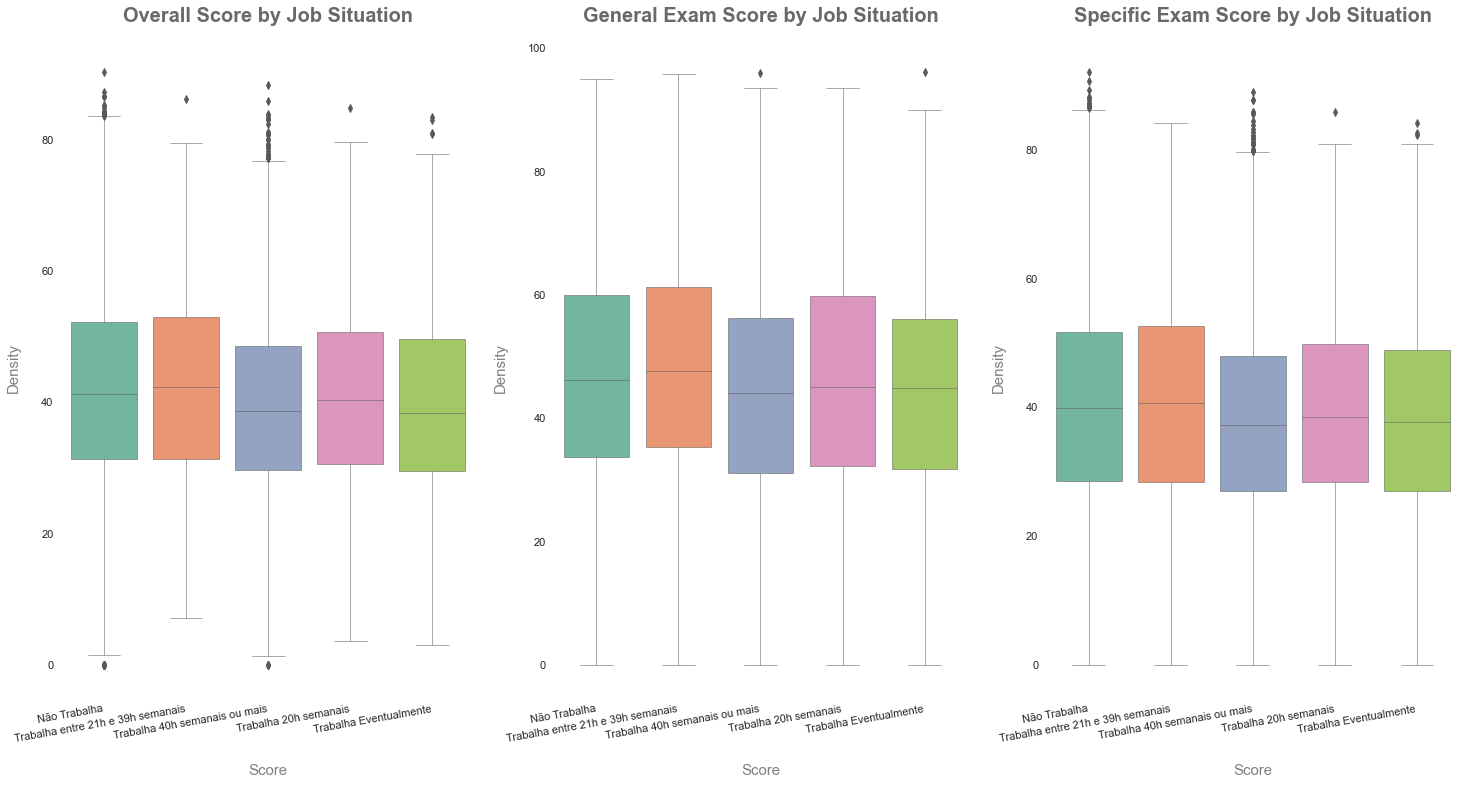

In [88]:
g1 = plt.subplot(1, 3, 1)
sns.boxplot(x='QE_I10', y ='NT_GER', data = df3, palette = 'Set2', linewidth = 0.5)
g1 = plt.title('Overall Score by Job Situation',
               pad = 20,
         fontsize = 20, color ='dimgrey', fontweight = 'bold')
g1 = sns.despine(bottom = True, left=True)
g1 = plt.xlabel( 'Score', color = 'grey', labelpad = 20, fontsize = 15 )
g1 = plt.ylabel( 'Density', color = 'grey', labelpad = 20, fontsize = 15 )
plt.xticks( rotation=10, horizontalalignment='right' )

#################################################plt.xticks(rotation=10, horizontalalignment='right')
g2 = plt.subplot(1, 3, 2)
sns.boxplot(x='QE_I10', y ='NT_FG', data = df3, palette = 'Set2', linewidth = 0.5)
g2 = plt.title('General Exam Score by Job Situation',
               pad = 20,
         fontsize = 20, color ='dimgrey', fontweight = 'bold')
g2 = sns.despine(bottom = True, left=True)
g2 = plt.xlabel('Score', color = 'grey', labelpad = 20, fontsize = 15)
g2 = plt.ylabel('Density', color = 'grey', labelpad = 20, fontsize = 15)
plt.xticks( rotation=10, horizontalalignment='right' )

#################################################
g3 = plt.subplot(1, 3, 3)
sns.boxplot(x='QE_I10', y ='NT_CE', data = df3, palette = 'Set2', linewidth = 0.5)
g3 = plt.title('Specific Exam Score by Job Situation',
               pad = 20,
         fontsize = 20, color ='dimgrey', fontweight = 'bold')
g3 = sns.despine(bottom = True, left=True)
g3 = plt.xlabel('Score', color = 'grey', labelpad = 20, fontsize = 15)
g3 = plt.ylabel('Density', color = 'grey', labelpad = 20, fontsize = 15)
plt.xticks( rotation=10, horizontalalignment='right' );

In [57]:
# Comparing the mean and the median
df3[['QE_I10','NT_GER','NT_FG','NT_CE']].groupby('QE_I10').agg(['median', 'mean', 'skew', ss.kurtosis])

NT_GER                        NT_FG                        NT_CE                      
                                  median   mean  skew kurtosis median   mean  skew kurtosis median   mean  skew kurtosis
QE_I10                                                                                                                  
Não Trabalha                      41.200 42.176 0.215   -0.345 46.200 46.883 0.018   -0.524 39.800 40.591 0.204   -0.373
Trabalha 20h semanais             40.300 41.081 0.191   -0.422 45.100 45.974 0.019   -0.619 38.400 39.436 0.217   -0.382
Trabalha 40h semanais ou mais     38.700 39.576 0.266   -0.182 44.000 44.262 0.093   -0.441 37.200 37.998 0.255   -0.240
Trabalha Eventualmente            38.350 40.100 0.323   -0.288 44.900 44.468 0.062   -0.376 37.700 38.627 0.285   -0.405
Trabalha entre 21h e 39h semanais 42.350 42.780 0.195   -0.537 47.600 47.961 0.007   -0.490 40.650 41.038 0.151   -0.606

For all classes, students who dont't work and work between 21 and 39 hours per week have the highest mean. So, let's perform a t-test with a null hypothesis that they have the same mean.

In [63]:
print(ss.ttest_ind(df3[df3['QE_I10'] == 'Não Trabalha']['NT_GER'], df3[df3['QE_I10'] == 'Trabalha entre 21h e 39h semanais']['NT_GER']))
print(ss.ttest_ind(df3[df3['QE_I10'] == 'Não Trabalha']['NT_FG'], df3[df3['QE_I10'] == 'Trabalha entre 21h e 39h semanais']['NT_FG']))
print(ss.ttest_ind(df3[df3['QE_I10'] == 'Não Trabalha']['NT_CE'], df3[df3['QE_I10'] == 'Trabalha entre 21h e 39h semanais']['NT_CE']))

Ttest_indResult(statistic=-1.435639567052803, pvalue=0.15113813309846966)
Ttest_indResult(statistic=-2.08312382442675, pvalue=0.037266839939185885)
Ttest_indResult(statistic=-0.9842505284535462, pvalue=0.32501762586634075)


The null hypothesys cannot be rejected at the level of 1%. So we conclude that, in general, there's no difference between those classes on average. The boxplot above allows us to conclude that both median and the range is no too differente.

### H2. Students who received a scholarship or some aid tends to have a higher score
**Conclusions**:
* Students from State schools that don't receive any scholarship have a score distribution concentrated in higher mean than the others;
* Students members of ProUni program also an overall mean;
* On average, students who received some kind of Need-Based Assistance (food and/or housing) have a higher score than students who don't;
* Students-researcher (here I'm talking about Inciação Científica) and students from the Programa de Educação Tutorial have the highest mean.

**Scholarships or loans**

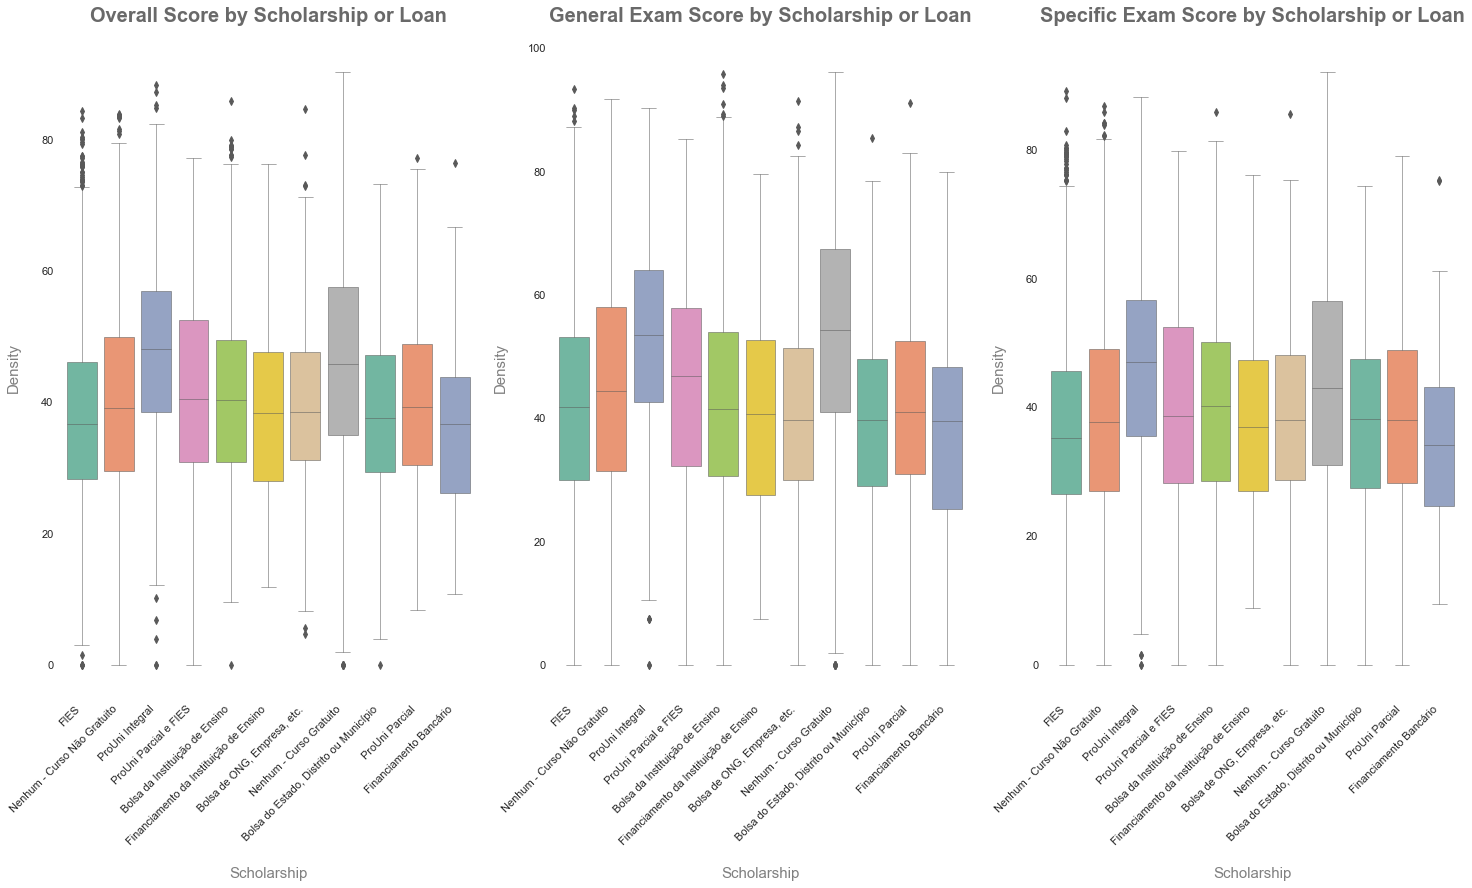

In [117]:
g1 = plt.subplot(1, 3, 1)
sns.boxplot(x='QE_I11', y ='NT_GER', data = df3, palette = 'Set2', linewidth = 0.5)
g1 = plt.title('Overall Score by Scholarship or Loan',
               pad = 20,
         fontsize = 20, color ='dimgrey', fontweight = 'bold')
g1 = sns.despine(bottom = True, left=True)
g1 = plt.xlabel( 'Scholarship', color = 'grey', labelpad = 20, fontsize = 15 )
g1 = plt.ylabel( 'Density', color = 'grey', labelpad = 20, fontsize = 15 )
plt.xticks( rotation=45, horizontalalignment='right' )

#################################################plt.xticks(rotation=10, horizontalalignment='right')
g2 = plt.subplot(1, 3, 2)
sns.boxplot(x='QE_I11', y ='NT_FG', data = df3, palette = 'Set2', linewidth = 0.5)
g2 = plt.title('General Exam Score by Scholarship or Loan',
               pad = 20,
         fontsize = 20, color ='dimgrey', fontweight = 'bold')
g2 = sns.despine(bottom = True, left=True)
g2 = plt.xlabel('Scholarship', color = 'grey', labelpad = 20, fontsize = 15)
g2 = plt.ylabel('Density', color = 'grey', labelpad = 20, fontsize = 15)
plt.xticks( rotation=45, horizontalalignment='right' )

#################################################
g3 = plt.subplot(1, 3, 3)
sns.boxplot(x='QE_I11', y ='NT_CE', data = df3, palette = 'Set2', linewidth = 0.5)
g3 = plt.title('Specific Exam Score by Scholarship or Loan',
               pad = 20,
         fontsize = 20, color ='dimgrey', fontweight = 'bold')
g3 = sns.despine(bottom = True, left=True)
g3 = plt.xlabel('Scholarship', color = 'grey', labelpad = 20, fontsize = 15)
g3 = plt.ylabel('Density', color = 'grey', labelpad = 20, fontsize = 15)
plt.xticks( rotation=45, horizontalalignment='right' );

In [120]:
print(ss.ttest_ind(df3[df3['QE_I11'] == 'Nenhum - Curso Gratuito']['NT_GER'], df3[df3['QE_I11'] == 'ProUni Integral']['NT_GER']))

Ttest_indResult(statistic=-3.6003089586173456, pvalue=0.00032087161611291115)


Even though it's presented only on t-test, for the other variables the result goes in the same direction. So, we can assume that the scores differs on average

**Need-Based**: assistance like for food and housing usually for low income students

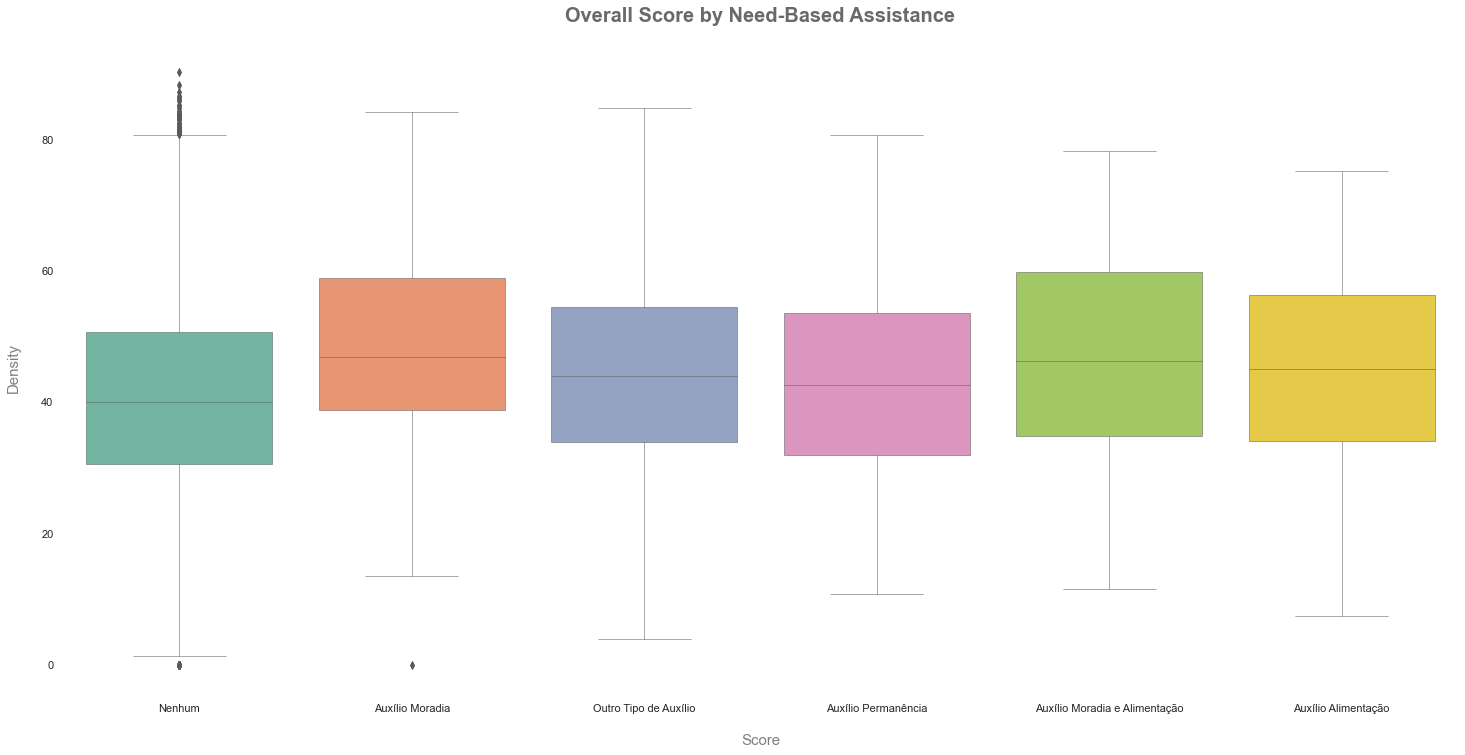

In [187]:
sns.boxplot(x='QE_I12', y ='NT_GER', data = df3, palette = 'Set2', linewidth = 0.5)
g1 = plt.title('Overall Score by Need-Based Assistance',
               pad = 20,
         fontsize = 20, color ='dimgrey', fontweight = 'bold')
g1 = sns.despine(bottom = True, left=True)
g1 = plt.xlabel( 'Score', color = 'grey', labelpad = 20, fontsize = 15 )
g1 = plt.ylabel( 'Density', color = 'grey', labelpad = 20, fontsize = 15 )
#plt.xticks( rotation=45, horizontalalignment='right' )

The score of students who received some kind of assistance is more concentrated in a higher range than the score of students with no assistance. <br>
Let's take a look at the distribution of two classes and test the mean.

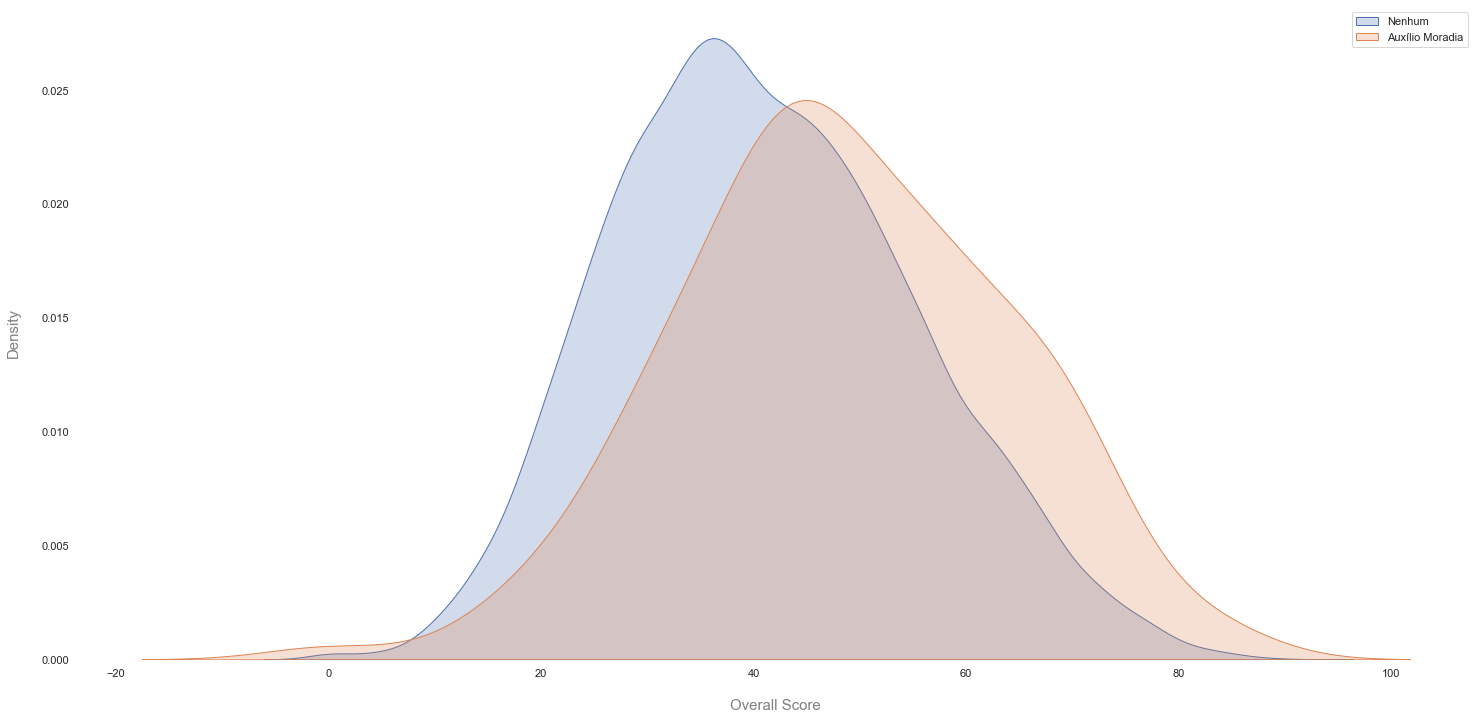

In [122]:
sns.kdeplot(df3[df3['QE_I12'] == 'Nenhum']['NT_GER'], label = 'Nenhum', shade = True)
sns.kdeplot(df3[df3['QE_I12'] == 'Auxílio Moradia']['NT_GER'], label = 'Auxílio Moradia', shade = True)
sns.despine(bottom = True, left=True)
plt.xlabel( 'Overall Score', color = 'grey', labelpad = 20, fontsize = 15 )
plt.ylabel( 'Density', color = 'grey', labelpad = 20, fontsize = 15 )
plt.legend();

In [104]:
print(ss.ttest_ind(df3[df3['QE_I12'] == 'Nenhum']['NT_GER'], df3[df3['QE_I12'] == 'Auxílio Moradia']['NT_GER']))

Ttest_indResult(statistic=-5.741381628357731, pvalue=9.548285397139373e-09)


For these two clases, the null hypothesis can be rejected at the level of 1%. So, the mean for the two classes is different.

**Academic Scholarship**: usually, a quantity of money received for being a student-researcher or other academic program

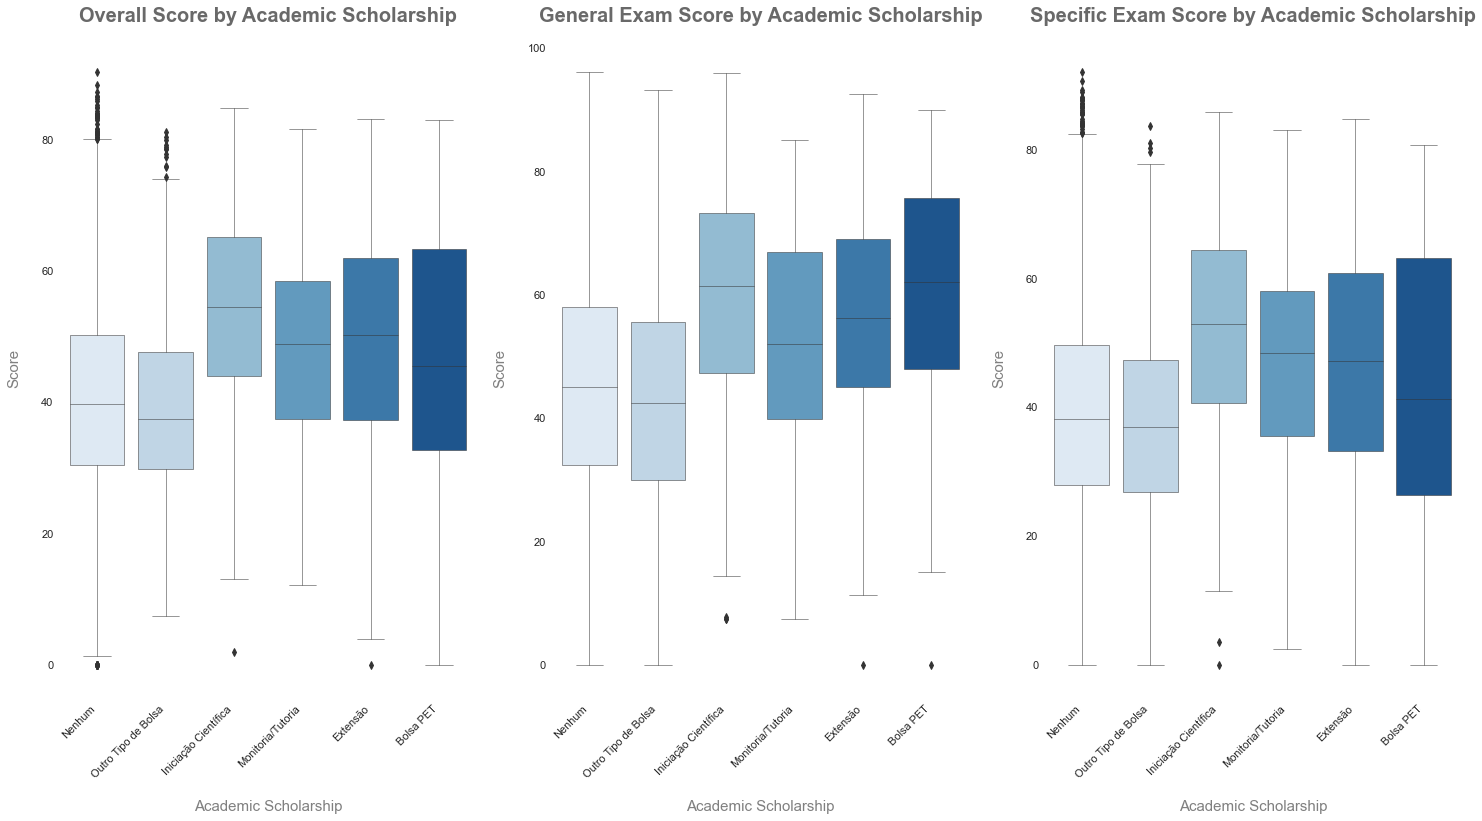

In [185]:
g1 = plt.subplot(1, 3, 1)
sns.boxplot(x='QE_I13', y ='NT_GER', data = df3, palette = 'Blues', linewidth = 0.5)
g1 = plt.title('Overall Score by Academic Scholarship',
               pad = 20,
         fontsize = 20, color ='dimgrey', fontweight = 'bold')
g1 = sns.despine(bottom = True, left=True)
g1 = plt.xlabel( 'Academic Scholarship', color = 'grey', labelpad = 20, fontsize = 15 )
g1 = plt.ylabel( 'Score', color = 'grey', labelpad = 20, fontsize = 15 )
plt.xticks( rotation=45, horizontalalignment='right' )

#################################################plt.xticks(rotation=10, horizontalalignment='right')
g2 = plt.subplot(1, 3, 2)
sns.boxplot(x='QE_I13', y ='NT_FG', data = df3, palette = 'Blues', linewidth = 0.5)
g2 = plt.title('General Exam Score by Academic Scholarship',
               pad = 20,
         fontsize = 20, color ='dimgrey', fontweight = 'bold')
g2 = sns.despine(bottom = True, left=True)
g2 = plt.xlabel('Academic Scholarship', color = 'grey', labelpad = 20, fontsize = 15)
g2 = plt.ylabel('Score', color = 'grey', labelpad = 20, fontsize = 15)
plt.xticks( rotation=45, horizontalalignment='right' )

#################################################
g3 = plt.subplot(1, 3, 3)
sns.boxplot(x='QE_I13', y ='NT_CE', data = df3, palette = 'Blues', linewidth = 0.5)
g3 = plt.title('Specific Exam Score by Academic Scholarship',
               pad = 20,
         fontsize = 20, color ='dimgrey', fontweight = 'bold')
g3 = sns.despine(bottom = True, left=True)
g3 = plt.xlabel('Academic Scholarship', color = 'grey', labelpad = 20, fontsize = 15)
g3 = plt.ylabel('Score', color = 'grey', labelpad = 20, fontsize = 15)
plt.xticks( rotation=45, horizontalalignment='right' );

In [127]:
# Comparing the mean and the median
df3[['QE_I13','NT_GER','NT_FG','NT_CE']].groupby('QE_I13').mean()

,NT_GER,NT_FG,NT_CE
QE_I13,,,
Bolsa PET,47.209,59.747,43.018
Extensão,49.019,55.258,46.918
Iniciação Científica,53.783,59.155,51.975
Monitoria/Tutoria,48.059,52.141,46.682
Nenhum,40.700,45.413,39.113
Outro Tipo de Bolsa,39.408,43.636,37.982


### H3. Students who takes extra periods of study tends to have a higher score
**Conclusions:**
* We can say that the score increase as the number of books increases, but we found statistical evidence that students that read more than 8 books has a higher mean in average. We also found that there's no statistical difference between the mean score of students who don't read any extra book and the ones who read one or two, but the score in mean between these and the students who read three up to five books is statistically different;
* Students who studied more than hours per week have a higher score on average.

**Quantity of Books Readed** (per year)

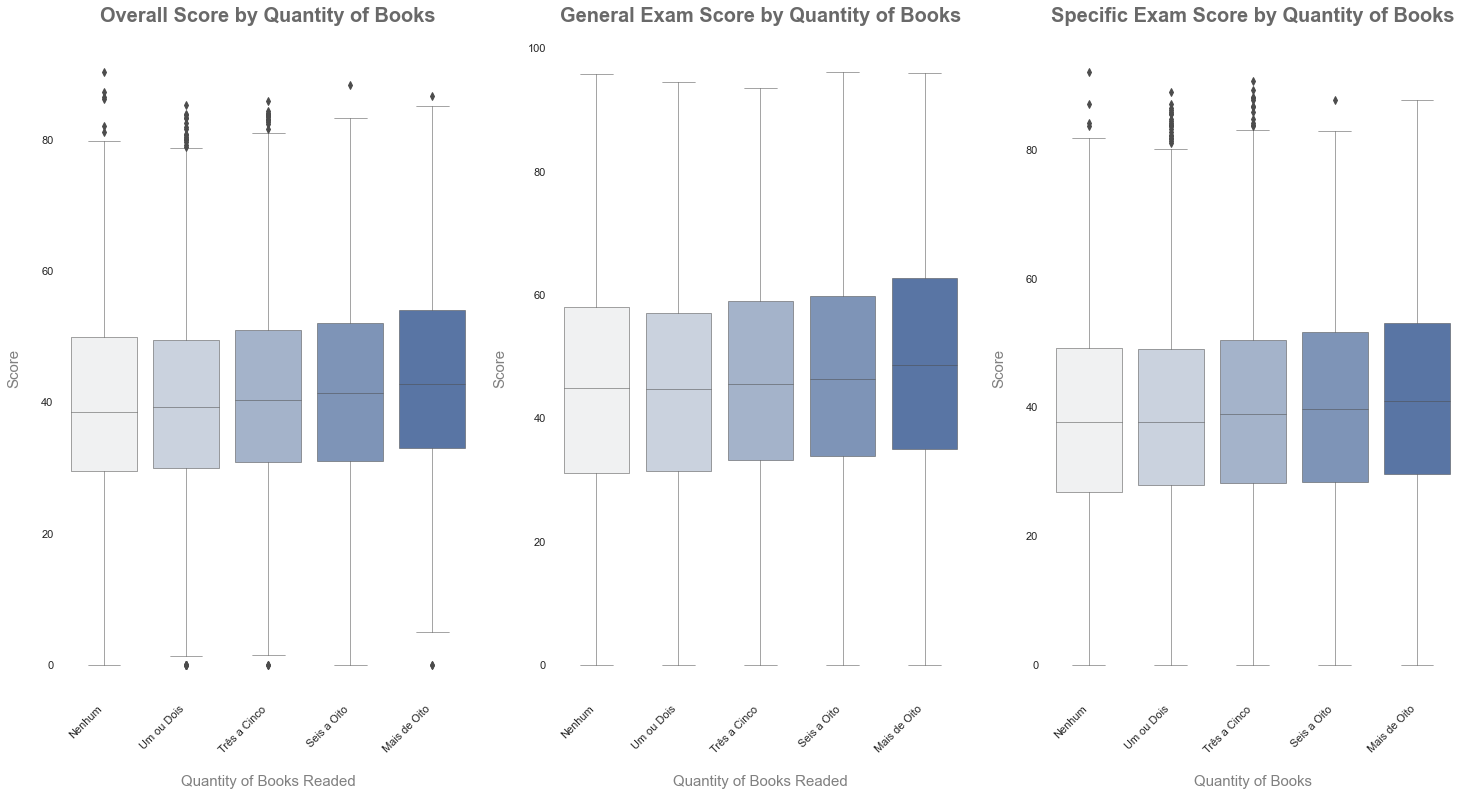

In [183]:
g1 = plt.subplot(1, 3, 1)
sns.boxplot(x='QE_I22', y ='NT_GER', data = df3, palette = 'light:b', linewidth = 0.5, order=['Nenhum', 'Um ou Dois', 'Três a Cinco', 'Seis a Oito', 'Mais de Oito'])
g1 = plt.title('Overall Score by Quantity of Books',
               pad = 20,
         fontsize = 20, color ='dimgrey', fontweight = 'bold')
g1 = sns.despine(bottom = True, left=True)
g1 = plt.xlabel( 'Quantity of Books Readed', color = 'grey', labelpad = 20, fontsize = 15 )
g1 = plt.ylabel( 'Score', color = 'grey', labelpad = 20, fontsize = 15 )
plt.xticks( rotation=45, horizontalalignment='right' )

#################################################plt.xticks(rotation=10, horizontalalignment='right')
g2 = plt.subplot(1, 3, 2)
sns.boxplot(x='QE_I22', y ='NT_FG', data = df3, palette = 'light:b', linewidth = 0.5, order=['Nenhum', 'Um ou Dois', 'Três a Cinco', 'Seis a Oito', 'Mais de Oito'])
g2 = plt.title('General Exam Score by Quantity of Books',
               pad = 20,
         fontsize = 20, color ='dimgrey', fontweight = 'bold')
g2 = sns.despine(bottom = True, left=True)
g2 = plt.xlabel('Quantity of Books Readed', color = 'grey', labelpad = 20, fontsize = 15)
g2 = plt.ylabel('Score', color = 'grey', labelpad = 20, fontsize = 15)
plt.xticks( rotation=45, horizontalalignment='right' )

#################################################
g3 = plt.subplot(1, 3, 3)
sns.boxplot(x='QE_I22', y ='NT_CE', data = df3, palette = 'light:b', linewidth = 0.5, order=['Nenhum', 'Um ou Dois', 'Três a Cinco', 'Seis a Oito', 'Mais de Oito'])
g3 = plt.title('Specific Exam Score by Quantity of Books',
               pad = 20,
         fontsize = 20, color ='dimgrey', fontweight = 'bold')
g3 = sns.despine(bottom = True, left=True)
g3 = plt.xlabel('Quantity of Books', color = 'grey', labelpad = 20, fontsize = 15)
g3 = plt.ylabel('Score', color = 'grey', labelpad = 20, fontsize = 15)
plt.xticks( rotation=45, horizontalalignment='right' );

In [154]:
# Comparing the mean and the median
df3[['QE_I22','NT_GER','NT_FG','NT_CE']].groupby('QE_I22').mean()

,NT_GER,NT_FG,NT_CE
QE_I22,,,
Mais de Oito,43.553,48.826,41.780
Nenhum,40.143,44.779,38.580
Seis a Oito,42.076,46.823,40.478
Três a Cinco,41.432,46.349,39.776
Um ou Dois,40.198,44.603,38.712


In [178]:
print('Overall - Nenhum e Mais de Oito: ',ss.ttest_ind(df3[df3['QE_I22'] == 'Três a Cinco']['NT_GER'], df3[df3['QE_I22'] == 'Um ou Dois']['NT_GER']))
print('Overall - Nenhum e Mais de Oito: ',ss.ttest_ind(df3[df3['QE_I22'] == 'Seis a Oito']['NT_GER'], df3[df3['QE_I22'] == 'Três a Cinco']['NT_GER']))
print('Overall - Nenhum e Mais de Oito: ',ss.ttest_ind(df3[df3['QE_I22'] == 'Mais de Oito']['NT_GER'], df3[df3['QE_I22'] == 'Seis a Oito']['NT_GER']))

Overall - Nenhum e Mais de Oito:  Ttest_indResult(statistic=4.821373183275915, pvalue=1.4430228815426628e-06)
Overall - Nenhum e Mais de Oito:  Ttest_indResult(statistic=1.6063372667545261, pvalue=0.10824199738976742)
Overall - Nenhum e Mais de Oito:  Ttest_indResult(statistic=2.9842086807402164, pvalue=0.00286200099333428)


We can't say, for all classes, that the score mean is statistically different as the quantity of books Read increases, except by the students who Read more than eight books in the year. Also, students who read between three and five books have a higher and statistically significant score mean when compared to students that read less books.

Now let's test the score mean for the first classes: 'No books' and 'One or Two'.

In [179]:
print('Overall - Nenhum e Um ou Dois: ',ss.ttest_ind(df3[df3['QE_I22'] == 'Nenhum']['NT_GER'], df3[df3['QE_I22'] == 'Um ou Dois']['NT_GER'])[1])
print('General - Nenhum e Um ou Dois: ',ss.ttest_ind(df3[df3['QE_I22'] == 'Nenhum']['NT_FG'], df3[df3['QE_I22'] == 'Um ou Dois']['NT_FG'])[1])
print('Specific - Nenhum e Um ou Dois: ',ss.ttest_ind(df3[df3['QE_I22'] == 'Nenhum']['NT_CE'], df3[df3['QE_I22'] == 'Um ou Dois']['NT_CE'])[1])

Overall - Nenhum e Um ou Dois:  0.877965153659127
General - Nenhum e Um ou Dois:  0.6929433081086157
Specific - Nenhum e Um ou Dois:  0.7337437349469329


There's no evidence to reject the null hypothesys of same mean. So, students who don't readed any book or read one or two have the same score on average.

**Student's Time Studied** (hour per week)

In [158]:
# Comparing the mean and the median
df3[['QE_I23','NT_GER','NT_FG','NT_CE']].groupby('QE_I23').mean()

,NT_GER,NT_FG,NT_CE
QE_I23,,,
Apenas as Aulas,39.123,44.363,37.360
Mais de Doze,45.083,49.915,43.456
Oito a Onze,43.955,48.907,42.288
Quantro a Sete,42.197,47.201,40.513
Uma a Três,39.147,43.546,37.664


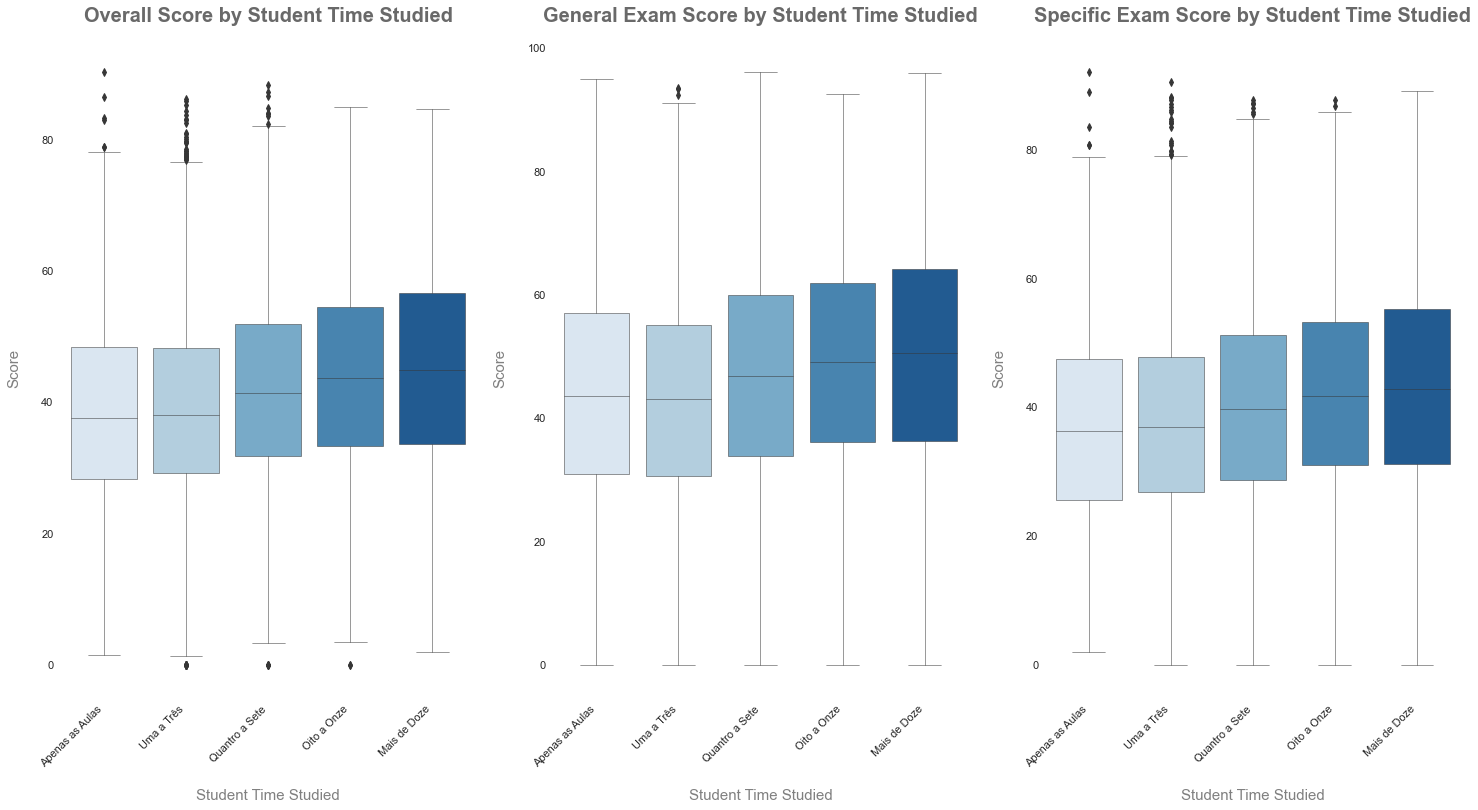

In [184]:
g1 = plt.subplot(1, 3, 1)
sns.boxplot(x='QE_I23', y ='NT_GER', data = df3, palette = 'Blues', linewidth = 0.5, order=["Apenas as Aulas","Uma a Três","Quantro a Sete","Oito a Onze", 'Mais de Doze'])
g1 = plt.title('Overall Score by Student Time Studied',
               pad = 20,
         fontsize = 20, color ='dimgrey', fontweight = 'bold')
g1 = sns.despine(bottom = True, left=True)
g1 = plt.xlabel( 'Student Time Studied', color = 'grey', labelpad = 20, fontsize = 15 )
g1 = plt.ylabel( 'Score', color = 'grey', labelpad = 20, fontsize = 15 )
plt.xticks( rotation=45, horizontalalignment='right' )

#################################################plt.xticks(rotation=10, horizontalalignment='right')
g2 = plt.subplot(1, 3, 2)
sns.boxplot(x='QE_I23', y ='NT_FG', data = df3, palette = 'Blues', linewidth = 0.5, order=["Apenas as Aulas","Uma a Três","Quantro a Sete","Oito a Onze", 'Mais de Doze'])
g2 = plt.title('General Exam Score by Student Time Studied',
               pad = 20,
         fontsize = 20, color ='dimgrey', fontweight = 'bold')
g2 = sns.despine(bottom = True, left=True)
g2 = plt.xlabel('Student Time Studied', color = 'grey', labelpad = 20, fontsize = 15)
g2 = plt.ylabel('Score', color = 'grey', labelpad = 20, fontsize = 15)
plt.xticks( rotation=45, horizontalalignment='right' )

#################################################
g3 = plt.subplot(1, 3, 3)
sns.boxplot(x='QE_I23', y ='NT_CE', data = df3, palette = 'Blues', linewidth = 0.5, order=["Apenas as Aulas","Uma a Três","Quantro a Sete","Oito a Onze", 'Mais de Doze'])
g3 = plt.title('Specific Exam Score by Student Time Studied',
               pad = 20,
         fontsize = 20, color ='dimgrey', fontweight = 'bold')
g3 = sns.despine(bottom = True, left=True)
g3 = plt.xlabel('Student Time Studied', color = 'grey', labelpad = 20, fontsize = 15)
g3 = plt.ylabel('Score', color = 'grey', labelpad = 20, fontsize = 15)
plt.xticks( rotation=45, horizontalalignment='right' );

### H4. The Highest the Family Income, the highest the score
**Conclusions**:
* Both score's mean and median increase as the income increase. 
* As the income increase, the 50% range increases.
* **In summary**: Income is directly related to the student's performance

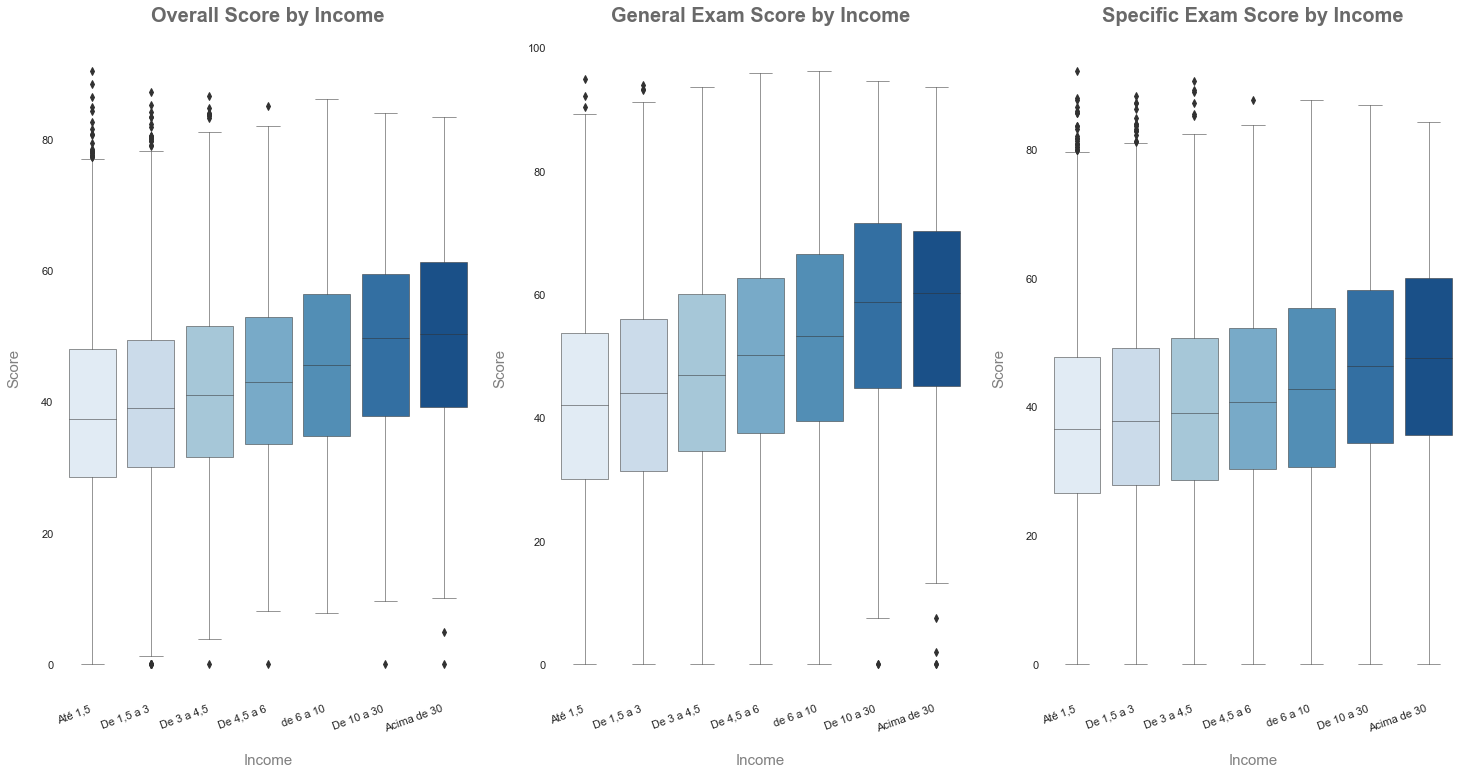

In [193]:
g1 = plt.subplot(1, 3, 1)
sns.boxplot(x='QE_I08', y ='NT_GER', data = df3, palette = 'Blues', linewidth = 0.5, order=["Até 1,5","De 1,5 a 3","De 3 a 4,5","De 4,5 a 6", 'de 6 a 10','De 10 a 30','Acima de 30'])
g1 = plt.title('Overall Score by Income',
               pad = 20,
         fontsize = 20, color ='dimgrey', fontweight = 'bold')
g1 = sns.despine(bottom = True, left=True)
g1 = plt.xlabel( 'Income', color = 'grey', labelpad = 20, fontsize = 15 )
g1 = plt.ylabel( 'Score', color = 'grey', labelpad = 20, fontsize = 15 )
plt.xticks( rotation=20, horizontalalignment='right' )

#################################################
g2 = plt.subplot(1, 3, 2)
sns.boxplot(x='QE_I08', y ='NT_FG', data = df3, palette = 'Blues', linewidth = 0.5, order=["Até 1,5","De 1,5 a 3","De 3 a 4,5","De 4,5 a 6", 'de 6 a 10','De 10 a 30','Acima de 30'])
g2 = plt.title('General Exam Score by Income',
               pad = 20,
         fontsize = 20, color ='dimgrey', fontweight = 'bold')
g2 = sns.despine(bottom = True, left=True)
g2 = plt.xlabel('Income', color = 'grey', labelpad = 20, fontsize = 15)
g2 = plt.ylabel('Score', color = 'grey', labelpad = 20, fontsize = 15)
plt.xticks( rotation=20, horizontalalignment='right' )

#################################################
g3 = plt.subplot(1, 3, 3)
sns.boxplot(x='QE_I08', y ='NT_CE', data = df3, palette = 'Blues', linewidth = 0.5, order=["Até 1,5","De 1,5 a 3","De 3 a 4,5","De 4,5 a 6", 'de 6 a 10','De 10 a 30','Acima de 30'])
g3 = plt.title('Specific Exam Score by Income',
               pad = 20,
         fontsize = 20, color ='dimgrey', fontweight = 'bold')
g3 = sns.despine(bottom = True, left=True)
g3 = plt.xlabel('Income', color = 'grey', labelpad = 20, fontsize = 15)
g3 = plt.ylabel('Score', color = 'grey', labelpad = 20, fontsize = 15)
plt.xticks( rotation=20, horizontalalignment='right' );

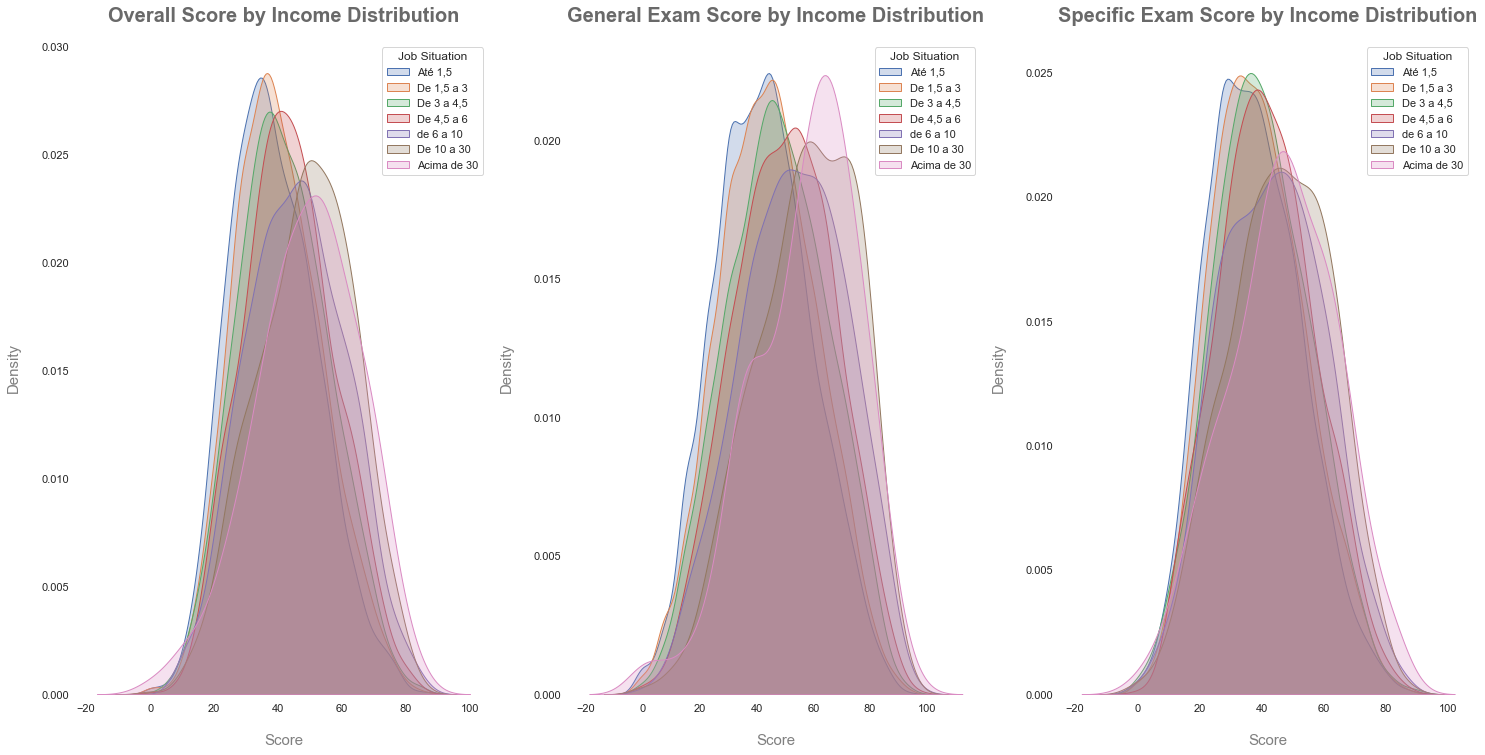

In [194]:
g1 = plt.subplot(1, 3, 1)
sns.kdeplot(df3[df3['QE_I08'] == 'Até 1,5']['NT_GER'], label = 'Até 1,5', shade = True)
sns.kdeplot(df3[df3['QE_I08'] == 'De 1,5 a 3']['NT_GER'], label = 'De 1,5 a 3', shade = True)
sns.kdeplot(df3[df3['QE_I08'] == 'De 3 a 4,5']['NT_GER'], label = 'De 3 a 4,5', shade = True)
sns.kdeplot(df3[df3['QE_I08'] == 'De 4,5 a 6']['NT_GER'], label = 'De 4,5 a 6', shade = True)
sns.kdeplot(df3[df3['QE_I08'] == 'de 6 a 10']['NT_GER'], label = 'de 6 a 10', shade = True)
sns.kdeplot(df3[df3['QE_I08'] == 'De 10 a 30']['NT_GER'], label = 'De 10 a 30', shade = True)
sns.kdeplot(df3[df3['QE_I08'] == 'Acima de 30']['NT_GER'], label = 'Acima de 30', shade = True)
g1 = plt.title('Overall Score by Income Distribution',
               pad = 20,
         fontsize = 20, color ='dimgrey', fontweight = 'bold')
g1 = sns.despine(bottom = True, left=True)
g1 = plt.xlabel('Score', color = 'grey', labelpad = 20, fontsize = 15)
g1 = plt.ylabel('Density', color = 'grey', labelpad = 20, fontsize = 15)
plt.legend(title='Job Situation')

#################################################
g2 = plt.subplot(1, 3, 2)
sns.kdeplot(df3[df3['QE_I08'] == 'Até 1,5']['NT_FG'], label = 'Até 1,5', shade = True)
sns.kdeplot(df3[df3['QE_I08'] == 'De 1,5 a 3']['NT_FG'], label = 'De 1,5 a 3', shade = True)
sns.kdeplot(df3[df3['QE_I08'] == 'De 3 a 4,5']['NT_FG'], label = 'De 3 a 4,5', shade = True)
sns.kdeplot(df3[df3['QE_I08'] == 'De 4,5 a 6']['NT_FG'], label = 'De 4,5 a 6', shade = True)
sns.kdeplot(df3[df3['QE_I08'] == 'de 6 a 10']['NT_FG'], label = 'de 6 a 10', shade = True)
sns.kdeplot(df3[df3['QE_I08'] == 'De 10 a 30']['NT_FG'], label = 'De 10 a 30', shade = True)
sns.kdeplot(df3[df3['QE_I08'] == 'Acima de 30']['NT_FG'], label = 'Acima de 30', shade = True)
g2 = plt.title('General Exam Score by Income Distribution',
               pad = 20,
         fontsize = 20, color ='dimgrey', fontweight = 'bold')
g2 = sns.despine(bottom = True, left=True)
g2 = plt.xlabel('Score', color = 'grey', labelpad = 20, fontsize = 15)
g2 = plt.ylabel('Density', color = 'grey', labelpad = 20, fontsize = 15)
plt.legend(title='Job Situation')

#################################################
g3 = plt.subplot(1, 3, 3)
sns.kdeplot(df3[df3['QE_I08'] == 'Até 1,5']['NT_CE'], label = 'Até 1,5', shade = True)
sns.kdeplot(df3[df3['QE_I08'] == 'De 1,5 a 3']['NT_CE'], label = 'De 1,5 a 3', shade = True)
sns.kdeplot(df3[df3['QE_I08'] == 'De 3 a 4,5']['NT_CE'], label = 'De 3 a 4,5', shade = True)
sns.kdeplot(df3[df3['QE_I08'] == 'De 4,5 a 6']['NT_CE'], label = 'De 4,5 a 6', shade = True)
sns.kdeplot(df3[df3['QE_I08'] == 'de 6 a 10']['NT_CE'], label = 'de 6 a 10', shade = True)
sns.kdeplot(df3[df3['QE_I08'] == 'De 10 a 30']['NT_CE'], label = 'De 10 a 30', shade = True)
sns.kdeplot(df3[df3['QE_I08'] == 'Acima de 30']['NT_CE'], label = 'Acima de 30', shade = True)
g3 = plt.title('Specific Exam Score by Income Distribution',
               pad = 20,
         fontsize = 20, color ='dimgrey', fontweight = 'bold')
g3 = sns.despine(bottom = True, left=True)
g3 = plt.xlabel('Score', color = 'grey', labelpad = 20, fontsize = 15)
g3 = plt.ylabel('Density', color = 'grey', labelpad = 20, fontsize = 15)
plt.legend(title='Job Situation');

In [190]:
# Comparing the mean and the median
df3[['QE_I08','NT_GER','NT_FG','NT_CE']].groupby('QE_I08').mean()

,NT_GER,NT_FG,NT_CE
QE_I08,,,
Acima de 30,49.085,57.046,46.410
"Até 1,5",38.694,42.277,37.483
"De 1,5 a 3",40.196,44.071,38.888
De 10 a 30,48.653,57.250,45.772
"De 3 a 4,5",41.760,47.137,39.952
"De 4,5 a 6",43.554,49.666,41.500
de 6 a 10,45.617,52.877,43.182


### H5. The higher the parents education level, the higher the score
**Conclusions:**
* As the parent's level of education increases, the student's score increases in mean.

In [14]:
# Comparing the mean and the median
df3[['QE_I04','NT_GER','NT_FG','NT_CE']].groupby('QE_I04').mean()

,NT_GER,NT_FG,NT_CE
QE_I04,,,
Ensino Médio,41.833,46.985,40.100
Fundamental: 1º ao 5º ano,39.337,43.080,38.073
Fundamental: 6º ao 9º ano,40.528,44.590,39.158
Nenhuma,38.942,43.225,37.497
Pós-Graduação,48.019,55.933,45.365
Superior (graduação),43.840,49.916,41.798


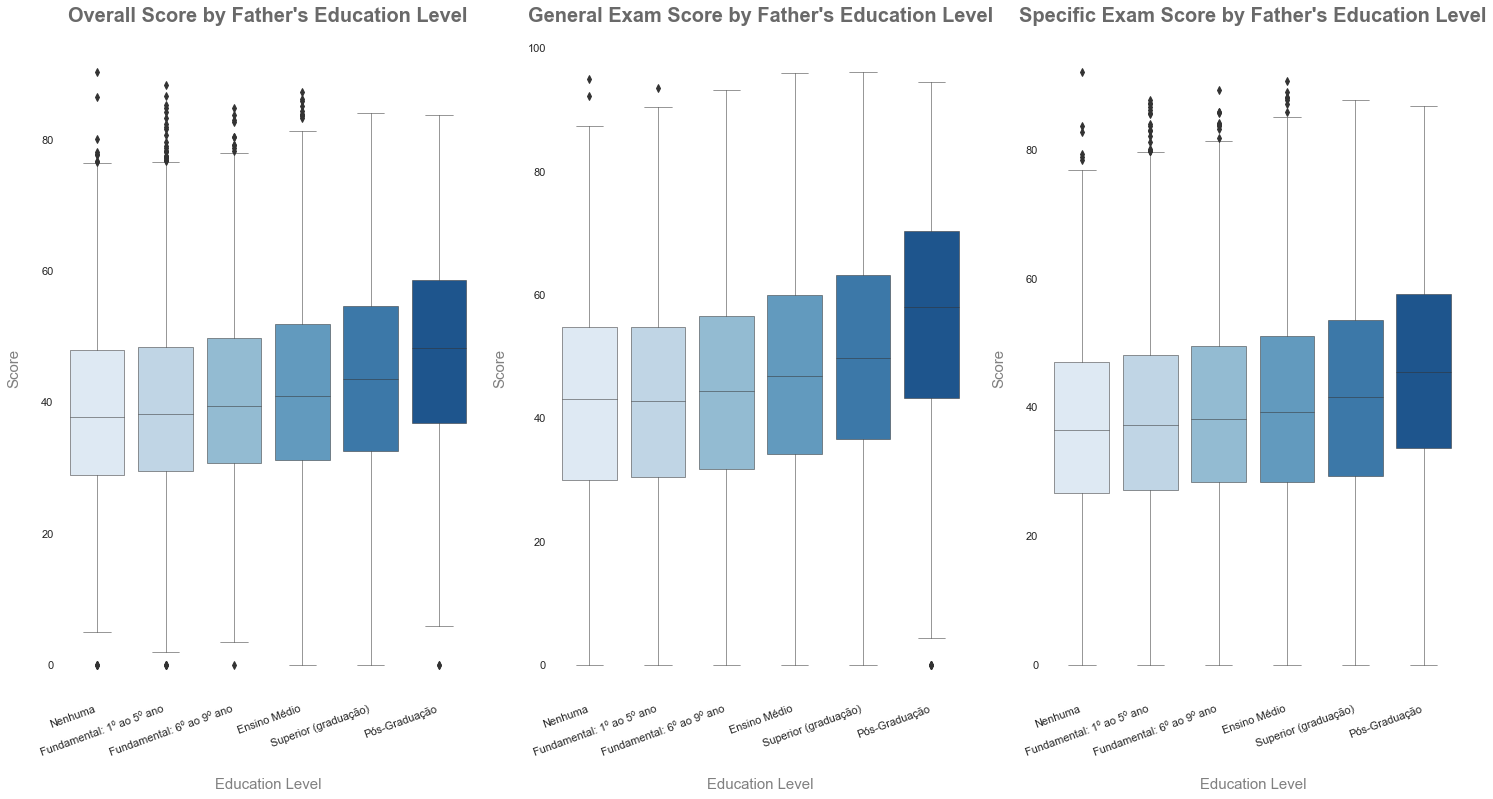

In [16]:
g1 = plt.subplot(1, 3, 1)
sns.boxplot(x='QE_I04', y ='NT_GER', data = df3, palette = 'Blues', linewidth = 0.5, order=["Nenhuma","Fundamental: 1º ao 5º ano","Fundamental: 6º ao 9º ano","Ensino Médio", 'Superior (graduação)','Pós-Graduação'])
g1 = plt.title('Overall Score by Father\'s Education Level',
               pad = 20,
         fontsize = 20, color ='dimgrey', fontweight = 'bold')
g1 = sns.despine(bottom = True, left=True)
g1 = plt.xlabel( 'Education Level', color = 'grey', labelpad = 20, fontsize = 15 )
g1 = plt.ylabel( 'Score', color = 'grey', labelpad = 20, fontsize = 15 )
plt.xticks( rotation=20, horizontalalignment='right' )

#################################################
g2 = plt.subplot(1, 3, 2)
sns.boxplot(x='QE_I04', y ='NT_FG', data = df3, palette = 'Blues', linewidth = 0.5, order=["Nenhuma","Fundamental: 1º ao 5º ano","Fundamental: 6º ao 9º ano","Ensino Médio", 'Superior (graduação)','Pós-Graduação'])
g2 = plt.title('General Exam Score by Father\'s Education Level',
               pad = 20,
         fontsize = 20, color ='dimgrey', fontweight = 'bold')
g2 = sns.despine(bottom = True, left=True)
g2 = plt.xlabel('Education Level', color = 'grey', labelpad = 20, fontsize = 15)
g2 = plt.ylabel('Score', color = 'grey', labelpad = 20, fontsize = 15)
plt.xticks( rotation=20, horizontalalignment='right' )

#################################################
g3 = plt.subplot(1, 3, 3)
sns.boxplot(x='QE_I04', y ='NT_CE', data = df3, palette = 'Blues', linewidth = 0.5, order=["Nenhuma","Fundamental: 1º ao 5º ano","Fundamental: 6º ao 9º ano","Ensino Médio", 'Superior (graduação)','Pós-Graduação'])
g3 = plt.title('Specific Exam Score by Father\'s Education Level',
               pad = 20,
         fontsize = 20, color ='dimgrey', fontweight = 'bold')
g3 = sns.despine(bottom = True, left=True)
g3 = plt.xlabel('Education Level', color = 'grey', labelpad = 20, fontsize = 15)
g3 = plt.ylabel('Score', color = 'grey', labelpad = 20, fontsize = 15)
plt.xticks( rotation=20, horizontalalignment='right' );

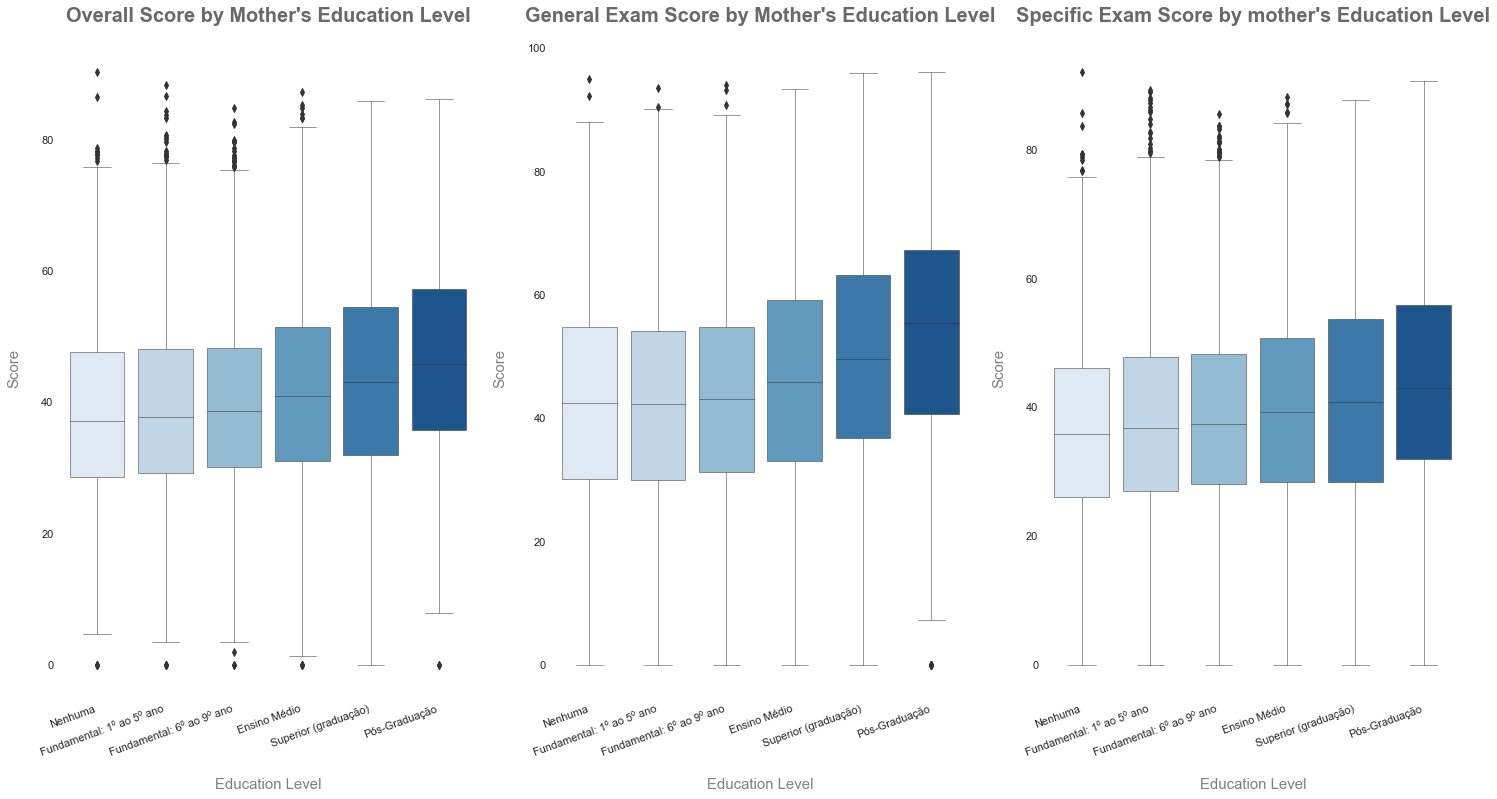

In [17]:
g1 = plt.subplot(1, 3, 1)
sns.boxplot(x='QE_I05', y ='NT_GER', data = df3, palette = 'Blues', linewidth = 0.5, order=["Nenhuma","Fundamental: 1º ao 5º ano","Fundamental: 6º ao 9º ano","Ensino Médio", 'Superior (graduação)','Pós-Graduação'])
g1 = plt.title('Overall Score by Mother\'s Education Level',
               pad = 20,
         fontsize = 20, color ='dimgrey', fontweight = 'bold')
g1 = sns.despine(bottom = True, left=True)
g1 = plt.xlabel( 'Education Level', color = 'grey', labelpad = 20, fontsize = 15 )
g1 = plt.ylabel( 'Score', color = 'grey', labelpad = 20, fontsize = 15 )
plt.xticks( rotation=20, horizontalalignment='right' )

#################################################
g2 = plt.subplot(1, 3, 2)
sns.boxplot(x='QE_I05', y ='NT_FG', data = df3, palette = 'Blues', linewidth = 0.5, order=["Nenhuma","Fundamental: 1º ao 5º ano","Fundamental: 6º ao 9º ano","Ensino Médio", 'Superior (graduação)','Pós-Graduação'])
g2 = plt.title('General Exam Score by Mother\'s Education Level',
               pad = 20,
         fontsize = 20, color ='dimgrey', fontweight = 'bold')
g2 = sns.despine(bottom = True, left=True)
g2 = plt.xlabel('Education Level', color = 'grey', labelpad = 20, fontsize = 15)
g2 = plt.ylabel('Score', color = 'grey', labelpad = 20, fontsize = 15)
plt.xticks( rotation=20, horizontalalignment='right' )

#################################################
g3 = plt.subplot(1, 3, 3)
sns.boxplot(x='QE_I05', y ='NT_CE', data = df3, palette = 'Blues', linewidth = 0.5, order=["Nenhuma","Fundamental: 1º ao 5º ano","Fundamental: 6º ao 9º ano","Ensino Médio", 'Superior (graduação)','Pós-Graduação'])
g3 = plt.title('Specific Exam Score by mother\'s Education Level',
               pad = 20,
         fontsize = 20, color ='dimgrey', fontweight = 'bold')
g3 = sns.despine(bottom = True, left=True)
g3 = plt.xlabel('Education Level', color = 'grey', labelpad = 20, fontsize = 15)
g3 = plt.ylabel('Score', color = 'grey', labelpad = 20, fontsize = 15)
plt.xticks( rotation=20, horizontalalignment='right' );

The score's median and mean increases as the mother and father's level of education increases. 